# спринт № 8. Алгоритмы на строках


## оглавление
<a id="title"></a>

* [Теория](#theory)
    * [Строки. Простейшие операции](#theory_1_start)
    * [Сравнение строк](#theory_2_start)
    * [Подстроки, префиксы и суффиксы](#theory_3_start)
    * [Поиск шаблона в строке. Наивный алгоритм](#theory_4_start)
    * [Префикс-функция](#theory_5_start)
    * [Вычисление префикс-функции](#theory_6_start)
    * [Эффективный поиск шаблона в тексте](#theory_7_start)
    * [Префиксное дерево](#theory_8)
    * [Разбор задачи «Быстрое сравнение двух строк»](#theory_9)
* [Промежуточные задачи](#tasks)
    * [А. Разворот строки](#A)
    * [B. Пограничный контроль](#B)
    * [C. Самый длинный палиндром 2](#C)
    * [D. Общий префикс](#D)
    * [E. Вставка строк](#E)
    * [F. Частое слово](#F)
    * [G. Поиск со сдвигом](#G)
    * [H. Глобальная замена](#H)
    * [I. Повтор](#I)
    * [J. Случай верблюда](#J)
    * [K. Сравнить две строки](#K)
    * [L. Подсчёт префикс-функции](#L)
* [Финальное задание](#final_tasks)
    * [A. Packed Prefix](#fin_A)
    * [B. Шпаргалка](#fin_B)
* [Rezume](#resume)
* [Неудачые дубли](#fail)


In [2]:
# # %%script false

# from IPython.display import display, Javascript

# def add_cell(text,  type='code', direct='above'):
#     text = text.replace('\n','\\n').replace("\"", "\\\"").replace("'", "\\'")

#     display(Javascript('''
#     var cell = IPython.notebook.insert_cell_{}("{}")
#     cell.set_text("{}")
#     '''.format(direct, type, text)));


# add_cell('<a id="theory"></a> \n ## Теория. \n [go back to the title](#title)','markdown')

# add_cell('<a id="tasks"></a> \n ## Промежуточные задачи. \n [go back to the title](#title) \n\n Ссылка на контекст','markdown')

# list_A = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
# for i in list_A:
#     add_cell(f'<a id={i}></a> \n ### {i}. \n [go back to the title](#title)', 'markdown')
#     add_cell(f'# code {i}')
    
# for i in list_A[0:2]:
#     add_cell(f'<a id="fin_{i}"></a> \n ### {i}. \n [go back to the title](#title)', 'markdown')
#     add_cell(f'# ID удачной попытки: \n \
#                 # -- ПРИНЦИП РАБОТЫ -- \n \
#                 # -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- \n \
#                 # -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- \n \
#                 # -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- \n \
#                 # \n  \
#                 ## code {i}')
    
# add_cell('<a id="resume"></a> \n ## Резюме. \n [go back to the title](#title)','markdown')
# add_cell('<a id="fail"></a> \n ## Неудачные попытки. \n [go back to the title](#title)','markdown')

<a id="theory"></a> 
# Теория. 
[go back to the title](#title)

<a id="theory_1_start"></a>
## Строки. Простейшие операции
[go back to the title](#title)

В этом спринте мы будем говорить про алгоритмы, работающие со строками. Строки, на первый взгляд, — довольно простые объекты, но и они могут преподнести немало сюрпризов.

### Символы в строках
Для начала обсудим, что из себя представляет строковый тип данных.
Строка — это набор символов, расположенных в определённом порядке. Казалось бы, всё просто. Но за словом «символ» скрывается много разных тонкостей. Например, в составе строки могут находиться не только буквы алфавита, цифры и знаки пунктуации, но и служебные символы: перевод строки, горизонтальная и вертикальная табуляция и так далее.
Некоторые символы даже не отображаются на экране. Например, символ BEL предназначен для того, чтобы издать звуковой сигнал, хотя в современных программах зачастую просто игнорируется. А другие символы — если их написать в определённом порядке — превращаются в один символ: какую-нибудь особенную букву или значок.

Символы могут комбинироваться с диакритическими знаками и превращаться в единый знак (в данном случае — в букву)
Большую часть спринта мы будем игнорировать все эти сложности и считать, что каждый символ — это самостоятельный элемент строки и занимает фиксированное число байтов (как правило, один). Пока что вам достаточно знать про кодировки совсем немного.
В большинстве языков программирования существует две функции: ord и chr, которые предназначены для того, чтобы переводить символ в его код и обратно.

Символ 'a' имеет код 97 в таблице символов ASCII. На базе ASCII сделаны все современные кодировки
Эта пара функций даёт возможность проводить с символами что-то вроде арифметических операций. Например, чтобы получить по символу 'a' следующий символ в таблице кодировки — букву 'b', нужно выполнить следующий код: chr(ord('a') + 1).

### Обозначения
Строку можно представить в виде массива, элементами которого являются символы. Это сходство позволяет нам воспользоваться тем же интерфейсом получения элемента по индексу, что был у массивов: ii-ый символ строки ss будем обозначать как s[i]. Такой синтаксис работает не во всех языках, но во всех них есть аналоги для получения символа по индексу. Нумерация символов начинается с нуля.
В описаниях алгоритмов мы нередко будем использовать математическую форму записи: sisi​. Когда нам понадобится разделить строку на несколько частей или даже на отдельные символы, в формуле мы будем ставить над ними горизонтальную черту, чтобы подчеркнуть, что это части единой строки. Например, запишем, что строка ss состоит из nn символов от s0 до sn−1:
s=s0s1…sn−1
.
Алла
А зачем изобретать какие-то специальные алгоритмы на строках, если мы уже умеем работать с массивами?
Тимофей
В массивах обычно каждый элемент важен сам по себе и обрабатывается отдельно от остальных. А когда мы работаем со строками, для нас важны не одиночные элементы, а целые группы подряд идущих символов.
Поэтому мы введём ещё одну запись: s[j,k) или s[jk)s[jk)​. Так мы будем обозначать подстроку, состоящую из всех символов строки с jj-го по (k−1)(k−1)-ый.
Мы специально используем полуоткрытый интервал [j,k)[j,k), не включающий kk.
Во-первых, благодаря этому можно закодировать подстроки нулевой длины. Например, s[kk)s[kk)​ будет пустой строкой.
Во-вторых, это позволяет компактнее записывать разбиение строки на части: s=s[0n)=s[0k)s[kn)‾s=s[0n)​=s[0k)​s[kn)​​. Символ sksk​ будет содержаться в строке s[kn)s[kn)​, но не войдёт в s[0k)s[0k)​.
Длина строки s[jk)s[jk)​ равна k−jk−j. Если бы мы использовали интервал, включающий оба конца, в формуле возникла бы дополнительная единица, за которой пришлось бы внимательно следить.

Позиции нумеруются с нуля, поэтому на позиции 2 стоит символ ‘‘с". Позиция 4 в подстроку уже не входит, а значит последняя позиция подстроки — 3, на которой стоит ‘‘d".

### Вставка в середину строки
Итак, мы выяснили, что строки ведут себя аналогично массивам. О том, как работает вставка в конец массива, мы подробно говорили в прошлых уроках — это довольно простая и быстрая операция как для массивов, так и для строк.
Другое дело — вставка в середину строки. Чтобы её совершить, надо сначала выделить память, а затем сдвинуть все символы после индекса вставки на несколько позиций вперёд. Мы уже разбирали, как производить вставку элемента в середину массива. Но со строками ситуация оказывается сложнее, поскольку чаще всего нам нужно будет добавлять не один символ, а сразу несколько. По этой причине сдвиг следует проводить с конца строки, чтобы не стереть другие символы. И лишь после того как символы сдвинуты, можно на освободившееся место записывать вставляемую подстроку. Получается очень дорогая операция:

    #Вставить строку substring в строку string перед позицией index.
    функция insert(string, index, substring):
        length = длина(string)
        shift = длина(substring)
        если index > length: # index == length - край строки
            ошибка! нет такой позиции
        расширить область памяти строки до размера length + shift
        если length > 0:
            # Если length == 0, делать сдвиг нет смысла.
            # Кроме того, не следует в вычислениях писать (length - 1), 
            #   не проверив, что индекс не ноль.
            # В некоторых языках длина представляется беззнаковым целым числом,
            #   в таком случае (length - 1) будет равен не -1, а числу MAX_INT,
            #   и цикл станет некорректным. Мы этого избегаем.
            для i от (length - 1) до index включительно, с шагом -1:
                string[shift + i] = string[i]

        для i от 0 до (shift - 1):
            string[index + i] = substring[i]
 

Если вам после этого курса захочется написать свой текстовый редактор, такой метод вам не подойдёт: всякий раз, когда пользователь будет добавлять символ в середину уже написанного текста, придётся проводить операцию сдвига, которая затрачивает O(n) времени. Если вы столкнётесь с подобной проблемой, почитайте про верёвочную строку (англ. rope) — это специальная структура данных, которая описывает строку в виде дерева, состоящего из подстрок меньшего размера. Благодаря такой организации данных, вставка не требует сдвига всех символов, и работает за логарифмическое время. Правда, поиск символа по индексу в такой структуре, напротив, замедляется: вместо O(1) он тоже займёт O(log⁡n).

<a id="theory_1_end"></a>
Решите задачи «[Разворот строки](#A)», «[Вставка строк](#E)».

[go back to the title](#title)

<a id="theory_2_start"></a>
## Сравнение строк
[go back to the title](#title)

    Алла:
    А какая самая простая задача при работе со строками?
    Рита
    Наверное, сравнение двух строк first и second на равенство.
    Алла
    Ну это же совсем легко. Строки равны, если у них одинаковая длина и все символы на соответствующих позициях — совпадают. То есть, если хотя бы один символ не совпадает, строки не равны.

    def compare(first, second):
        если длина(first) ≠ длина(second):
            вернуть False

        length = длина(first)
        для i от 0 до (length - 1):
            если first[i] ≠ second[i]:
                вернуть False

        return True 

    Тимофей: Всё верно. И это сравнение работает за O(n), где n — длина строки.
    Алла: Но длина какой из строк имеется в виду, first или second?
    Тимофей: Если эти строки имеют разную длину, то мы сразу, за O(1) можем сказать, что строки не равны. А если строки имеют одинаковую длину, то не важно, какую из этих длин брать. Поэтому n — длина любой из строк.
    
### Регистронезависимое сравнение
    Гоша: Я вижу одну проблему. Люди часто пишут одни и те же слова то большими буквами, то маленькими. Но ведь получается, если у меня в телефонной книге сохранён контакт «Алла», а я напишу в поиске «АЛЛА», то ничего не найдётся.
    Рита: Немного поправлю тебя. «Маленькие» буквы и «большие», а точнее строчные и прописные, называются в программировании буквами в нижнем и верхнем регистрах. Про слова, которые сочетают в себе оба этих типа букв, (как, например, «Алла»), говорят, что они записаны в смешанном регистре.
    
Чтобы сравнить две строки без учёта регистра, следует сначала привести их к единой форме. Например, заменить все буквы в верхнем регистре на аналогичные буквы в нижнем регистре: compare(lowercase(first), lowercase(second)).
Алла —> алла
АЛЛА —> алла
Приведение к «нормальной форме» — часто применяемый метод. Помните, как вы искали группы анаграмм в спринте про хеши? Для решения этой задачи нужно было составить хеш-таблицу, в которой значениями были оригинальные слова, а ключами — их нормализованные версии. Например, можно было отсортировать буквы слова в лексикографическом порядке, и тогда "LISTEN" и "SILENT" попадали в одну и ту же корзину "EILNST". Проверить, что два слова — анаграммы, можно следующим образом: compare(sorted(first), sorted(second)).
Обратите внимание, насколько разные сравнения можно проводить по одной и той же схеме:

    сначала мы по строке вычисляем некоторый ключ (например, нормальную форму, длину строки или любую другую её характеристику),
    а затем сравниваем значения ключей.

Мы подробно говорили об этом в спринте про сортировки.

Работа с ключами вместо объектов — распространённый приём. Он встречается и при работе с хеш-таблицами, и в сортировках, и при сравнении строк
Аналогичным образом можно сопоставлять слова, написанные кириллицей и транслитом. Или сравнивать слова по звучанию, преобразовывая их к специальному фонетическому алфавиту.
Гоша
Здорово. Про равенство двух строк теперь понятно. А как строки упорядочить? Какая строка больше, какая меньше?
Рита
Помните, мы говорили про лексикографическую сортировку: сначала сравниваются первые символы строки, если они равны, сравниваются вторые символы, и так далее, пока не найдётся различающийся символ. Сами символы сравниваются по их номеру в таблице кодировки.
Будьте аккуратны с кодировками, а также с регистром букв. Попробуем для примера сравнить две строки: "A_a" и "Aa_", а затем привести их к нижнему и верхнему регистрам и снова сравнить уже нормализованные строки:
1) "A_a" < "Aa_" даёт True — сравнение исходных строк;
2) "a_a" < "aa_" даёт True — сравнение строк, приведённых к нижнему регистру;
3) "A_A" < "AA_" даёт False — сравнение строк, приведённых к верхнему регистру.
Такой неожиданный результат сравнения получается из-за того, что символ подчёркивания идёт в таблице кодировки ASCII позднее буквы верхнего регистра, но раньше букв нижнего регистра: 'A' < '_' < 'a'.

<a id="theory_2_end"></a>
Решите задачи «[Пограничный контроль](#B)» и «[Сравнить две строки](#K)».

[go back to the title](#title)

<a id="theory_3_start"></a>
## Подстроки, префиксы и суффиксы
[go back to the title](#title)

Чтобы двигаться дальше, нам нужно формализовать некоторые понятия.
Глоссарий

    Алфавит ΣΣ — конечное множество символов. Например, все буквы русского и английского алфавитов, цифры, пробелы и прочие служебные знаки. Сложность некоторых алгоритмов будет зависеть от размера алфавита — ∣Σ∣∣Σ∣, поэтому разумно ограничивать его только теми символами, которые могут встретиться в используемых строках.
    Строка — некоторая последовательность символов алфавита. Длину строки будем обозначать length(s)length(s) или просто ∣s∣∣s∣.
    Подстрока — непрерывная часть строки.
    Для строки s=‘‘abcdef"s=‘‘abcdef" строка ‘‘bcd"‘‘bcd" является подстрокой; строки ‘‘acf"‘‘acf" и ‘‘cba"‘‘cba" — не являются подстроками ss.
    Конкатенация — склеивание строк в единую строку. Например, concat("alpha", "bet") даст "alphabet".
    Префикс строки — подстрока, с которой строка начинается. Более формально префикс строки — это такая строка, которую можно дополнить, дописав справа ноль или больше символов, и получить исходную строку. Например, для строки ss префиксами будут строки """", "a""a", "ab","ab", "abc""abc", "abcd""abcd", "abcde""abcde", "abcdef""abcdef". Чтобы получить префикс длины ll нужно взять первые ll букв строки. Самый короткий префикс — это пустая строка, самый длинный — сама строка ss целиком.
    Суффикс строки — подстрока, которой строка заканчивается. Например, у строки ss суффиксы: """", "f""f", "ef""ef", "def""def", "cdef""cdef", "bcdef""bcdef", "abcdef""abcdef".

image
У строки "abcdef" (длины 6) есть по 7 суффиксов и префиксов. Обратите внимание, что суффикс и префикс длины L=0 представляют собой пустую строку. А суффикс и префикс длины L=6 совпадают между собой и равны исходной строке
Любая строка s[0,n)s[0,n)​ может быть несколькими способами разделена на префикс s[0,t)s[0,t)​ и суффикс s[t,n)s[t,n)​.
image
Один из способов разделить строку на две половины: префикс s[0,2)s[0,2)​ и суффикс s[2,6)s[2,6)​
Обратите внимание, что для любой строки ss пустая строка является префиксом s[n,n)s[n,n)​. Вся строка ss целиком также является префиксом s[0,n)s[0,n)​. Одновременно эти строки являются и суффиксами ss. Однако эти частные случаи удобнее всего рассматривать отдельно. Для этого существует понятие «собственного префикса» (англ. proper prefix).
Собственный префикс строки ss — это любой префикс, кроме префикса длины ∣s∣∣s∣, совпадающего с полной строкой.
Иногда определение исключает из собственных префиксов ещё и пустую строку, но нам будет легче работать с префиксами, которым разрешено быть пустыми.
Аналогичным образом определяется собственный суффикс.
Отметьте все собственные префиксы строки "abc""abc".
Правильный ответ
""""
Правильный ответ
"a""a"
Правильный ответ
"ab""ab"
"abc""abc"
Зачем нужны префиксы и суффиксы
Алла
Зачем нужны подстроки, я понимаю. Например, слово в предложении — это подстрока. Если мы ищем в тексте какой-то отрывок, это тоже подстрока. Но зачем нам нужны ещё какие-то префиксы и суффиксы?
Тимофей
Подстрока — сложный объект, у неё есть две «плавающих» границы: позиция начала и позиция конца. А у префикса и суффикса одна из двух границ чётко закреплена: мы точно знаем, где находится начало префикса, где — конец суффикса. Поэтому работать с ними гораздо проще.
Алла
Да, но ведь большинство подстрок не являются ни префиксами, ни суффиксами. Чем же они нам помогут?
Тимофей
Давай в строке s[0,n)s[0,n)​ рассмотрим подстроку s[l,r)s[l,r)​. Чтобы задать такую подстроку, мы должны указать позиции её начала и конца: ll и rr. Но можно сделать эти два действия по-отдельности:

    Разделим строку по левой границе подстроки на префикс s[0,l)s[0,l)​ и суффикс s[l,n)s[l,n)​. Вся подстрока s[l,r)s[l,r)​ лежит внутри суффикса s[l,n)s[l,n)​. Получается, что взяв от исходной строки суффикс, мы зафиксировали одну из двух границ подстроки — левую.
    Рассмотрим теперь этот суффикс s[l,n)s[l,n)​ и возьмём от него префикс, заканчивающийся на позиции rr. Это зафиксирует вторую границу подстроки — правую.

Алла
То есть подстрока — это префикс суффикса?
Тимофей
Да, ты правильно поняла. Любую подстроку можно представить в виде префикса некоторого суффикса.
Для примера возьмём строку "show must go on" и разметим в ней подстроку "must".

show must go on  (текст)
     __________
    |must go on  (суффикс)
     ____
     must|       (префикс суффикса) 

Можно сказать и наоборот: подстрока — это суффикс префикса.

show must go on  (текст)
_________
show must|       (префикс)
     ____
    |must        (суффикс префикса) 

Алла
Всё равно не понимаю, зачем нам это?
Тимофей
Во многих задачах нам придётся перебирать разные подстроки — например, при поиске шаблона в тексте. Этот процесс мы разобьём на два цикла. Во внешнем цикле будем сдвигать левую границу подстроки, то есть перебирать все возможные суффиксы строки. Во внутреннем цикле сдвигаться будет правая граница — то есть мы будем перебирать префиксы этого суффикса.
Идея двух вложенных циклов, перебирающих левую и правую границы может показаться тривиальной. Но благодаря тому, что мы рассматриваем получающиеся подстроки в качестве таких простых объектов как префиксы и суффиксы, нам будет легко описать, как изменяются такие признаки как число совпадений подстроки с шаблоном при сдвиге одной из границ.
Кроме того, некоторые алгоритмы требуют сделать предподсчёт некоторых характеристик для различных участков строки. Предподсчёт для всех возможных подстрок занял бы очень много времени и памяти — ведь число строк квадратично зависит от длины строки. А все возможные префиксы (или суффиксы) можно перебрать за линейное время. Поэтому важно уметь формулировать вычисления в терминах префиксов и суффиксов строки.
В следующих нескольких уроках мы рассмотрим, как с помощью анализа префиксов эффективно искать шаблон в строке.

[go back to the title](#title)

<a id="theory_4_start"></a>
## Поиск шаблона в строке. Наивный алгоритм
[go back to the title](#title)

Наверное, самая востребованная операция при работе со строками — поиск подстроки в строке. Она применяется и в текстовых редакторах, и когда вы фильтруете данные в лог-файлах, и когда пытаетесь найти на компьютере документ с определённым словом в названии.
Задача формулируется следующим образом: найти индекс первого вхождения подстроки pattern в строке text. Чтобы избежать путаницы, будем называть подстроку pattern шаблоном. Давайте договоримся, что пока это будет фиксированная строка. А потом мы перейдём к более сложным шаблонам, под которые одновременно смогут подходить разные строки.
В этом уроке мы рассмотрим наивный алгоритм такого поиска. А следующий урок будет посвящён его более эффективной реализации.
### Поиск первого вхождения шаблона в строку
Наивный метод предполагает, что мы будем перебирать все возможные позиции начала шаблона, а затем символ за символом сравнивать строку с шаблоном. На первом же несовпадении проверку можно закончить и перейти к следующей позиции строки.

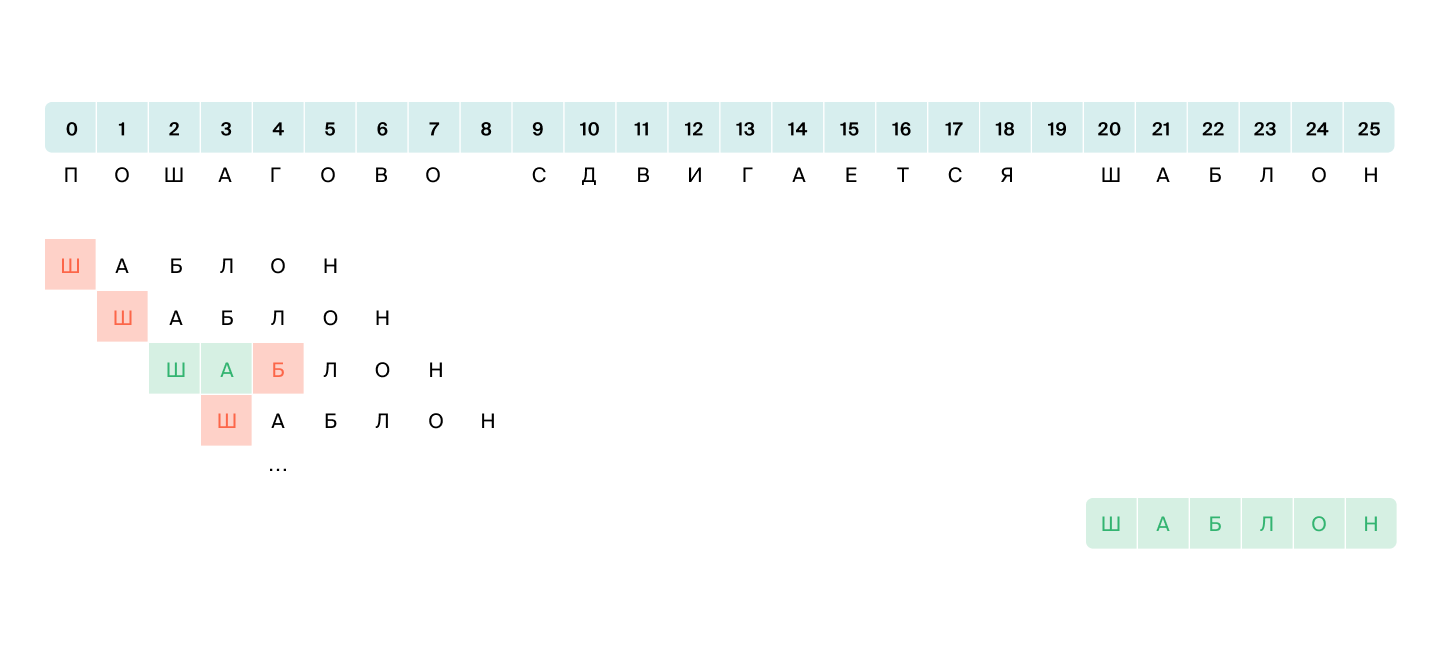

    Подстроки на зелёным фоне — это участки шаблона, которые совпали со строкой. Красным отмечены позиции, на которых обнаружено первое несоответствие текста с шаблоном. На большинстве стартовых позиций не совпадает первый же символ. Однако на позиции 2 первые несколько символов совпали, и только третья буква шаблона разошлась с текстом в строке

Реализовать эту функцию можно следующим образом:

    #Найти первое вхождение подстроки pattern в строке text,
    #находящееся на позиции не раньше start.
    функция find(text, pattern, start = 0):
        если длина(text) < длина(pattern):
            вернуть -1  # Длинный шаблон не может содержаться в короткой строке.
        для pos от start до (длина(text) - длина(pattern)):
            # Проверяем, не совпадёт ли шаблон, сдвинутый на позицию pos,
            #   с соответствующим участком строки.
            match = True
            для offset от 0 до длина(pattern) - 1:
                если text[pos + offset] ≠ pattern[offset]:
                    # Одного несовпадения достаточно, чтобы не проверять
                    #   дальше текущее расположение шаблона.
                    match = False
                    break
            # Как только нашлось совпадение шаблона, возвращаем его.
            # Это первое вхождение шаблона в строку.
            если match == True:
                вернуть pos
            # Если совпадение не нашлось, цикл перейдёт к проверке следующей позиции.
        # Числом -1 часто маркируют, что подстрока не была найдена,
        #   поскольку в строке нет позиции -1.
        # В качестве альтернативы можно возвращать None.
        вернуть -1 

### Поиск всех вхождений шаблона в строку
Гоша
Странно! Разве в этой функции должно быть не два параметра? Зачем в ней появился третий аргумент — start?
Рита
Этот параметр очень поможет нам, если мы захотим найти не только первое вхождение слова, но и все последующие.
Попробуем в строке "мне ни холодно ни жарко" найти слово "ни". Первое вхождение будет на позиции 4, второе — на позиции 15.
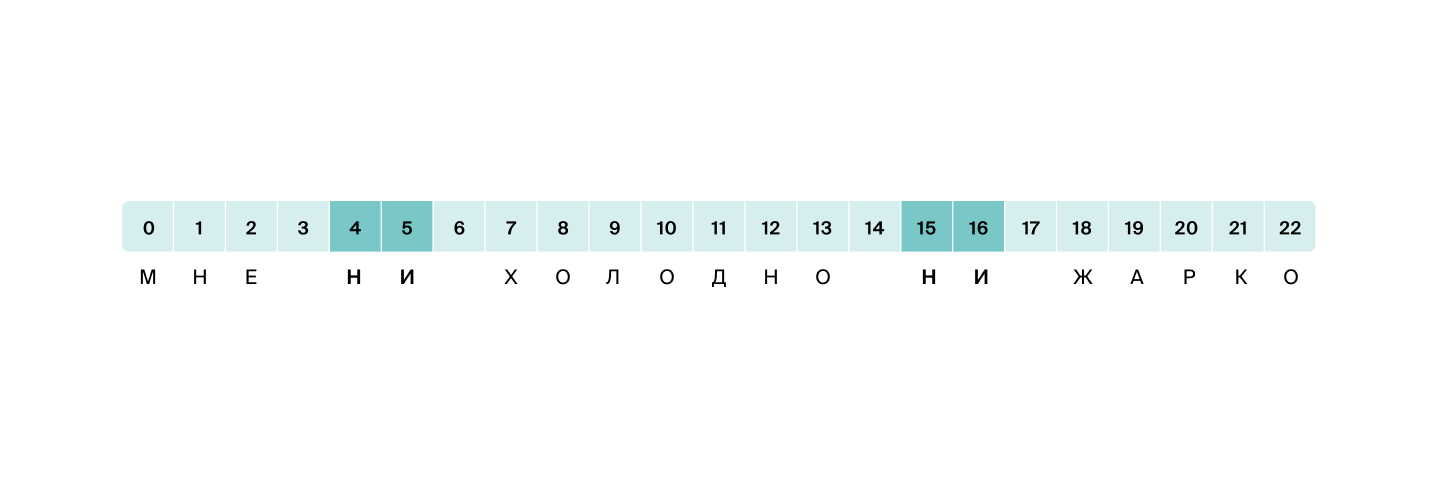
    
    В исходной строке размечены вхождения шаблона "ни". Позицией вхождения считается индекс строки, соответствующий нулевому символу шаблона. В нашем случае это позиции 4 и 15

Если мы передадим в функцию find параметр start = 0, будет найдено вхождение на позиции 4. Тот же результат мы получим, если будем передавать в качестве start числа 1, 2, 3, 4. Но если мы передадим start = 5, результатом работы функции будет уже следующее вхождение: число 15 — это первое вхождение шаблона "ни" в наш текст, расположенное не раньше позиции 5.
Если мы будем запускать поиск шаблона, стартуя с позиций start от 5 до 15, мы получим один и тот же результат — 15. Начиная с позиции 16, результат снова изменится: он будет равен -1, так как в оставшейся части строки шаблон отсутствует.
Напишем алгоритм, который найдёт все вхождения подстроки в строку.

    функция find_all(text, pattern):
        occurrences = [ ]
        start = 0 # Начнём поиск с начала строки.
        # Найдём первое вхождение, если оно есть.
        пока (pos = find(text, pattern, start)) ≠ -1:
            occurrences.push(pos) # Сохраним вхождение в список.
            start = pos + 1       # И продолжим поиск, начиная с позиции, 
                                  #   следующей за только что найденной.
        вернуть occurrences 

Сложность наивного алгоритма
Алла
Я посчитала сложность этого метода. В нём используются вложенные циклы, поэтому алгоритм выполняется в худшем случае за O(n⋅m)O(n⋅m), где nn — длина строки, mm — длина шаблона.
Тимофей
Всё правильно. Кстати, такие алгоритмы тоже часто называют квадратичными, хотя тут и нет знака возведения в квадрат.
Алла
А почему так?
Тимофей
Потому что в худшем случае длина шаблона может быть пропорциональна длине строки. Например, шаблон имеет длину, равную половине исходной строки: m=n/2m=n/2. Тогда нам нужно проверить приблизительно n/2n/2 позиций и в каждой позиции провести n/2n/2 сравнений. Получится, что O(m⋅n)=O(n2)O(m⋅n)=O(n2). То есть алгоритм работает за время, квадратичное по длине исходной строки.
Алла
Теперь понятно, спасибо.
Гоша
А у меня ещё один вопрос есть. Разве проверка не будет завершаться в самом начале шаблона? Обычно ведь на первых же буквах становится понятно, что шаблон не подойдёт.
Тимофей
Ты прав, чаще всего так и бывает. Но алгоритм должен работать не только в типичных, но и в очень неудачных случаях, иначе можно будет подобрать киллер-последовательность, которая заставит программу зависнуть. Поскольку алгоритмы на строках часто работают с пользовательским вводом, злонамеренный пользователь легко сможет подсунуть алгоритму неудачные данные.
Гоша
Ого! А можешь показать киллер-последовательность, которая заставит алгоритм работать за квадратичное время?
Тимофей
О, это легко! Напишем длинную строку (например, из 1000 символов), состоящую из одинаковых букв: "AAA...AAA". В качестве шаблона возьмём строку длиной 500, где первые 499 символов — та же самая буква, а последний символ отличается: "AAA...AAZ". Получается, что на каждой позиции нам придётся проверить все 500 символов шаблона, чтобы убедиться, что строка нам не подходит.

<a id="theory_4_end"></a>
Решите задачу «[Поиск со сдвигом](#G)».

[go back to the title](#title)

<a id="theory_5_start"></a>
## Префикс-функция
[go back to the title](#title)

В прошлом уроке мы разобрали наивный алгоритм поиска шаблона в тексте. В худшем случае он будет затрачивать на работу O(n2)O(n2) времени, где nn — длина исходной строки. В следующих уроках мы расскажем о методах поиска, работающих за линейное время. Однако, чтобы их описать, нам понадобится ввести понятие префикс-функции.
### Что такое префикс-функция
Неформально говоря, префикс-функция строки — это длина наибольшего перекрытия строки с собой, то есть когда символы в начале строки совпадают с символами в конце строки. Например, строка «облако» перекрывается сама с собой по букве «о», то есть имеет перекрытие длины 1.
Но знать перекрытие полной строки с собой нам будет недостаточно. Помимо этого, мы должны выяснить, как перекрывается с собой каждый из префиксов строки. Договоримся далее называть эти префиксы подстроками. Например, подстрока «замерза» перекрывается с собой по буквам «за» (длина перекрытия 2), а подстрока «замер» — не перекрывается с собой вообще (длина перекрытия 0).

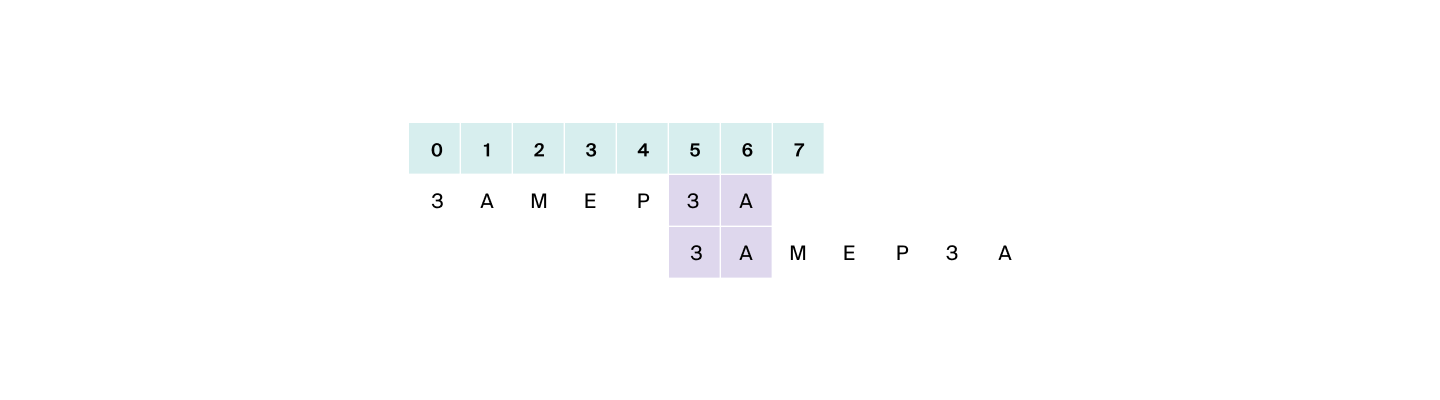

Для подстроки s[0,7)=«замерза»s[0,7)​=«замерза» существуют собственный префикс s[0,2)=«за»s[0,2)​=«за» и такой же собственный суффикс s[5,7)=«за»s[5,7)​=«за».
Теперь дадим формальное определение.
Префикс-функцией от строки ss и позиции ii (1⩽i⩽∣s∣1⩽i⩽∣s∣) называется длина kk наибольшего собственного префикса подстроки s[0,  i)s[0,i)​, который одновременно является её суффиксом (тоже собственным).
Другими словами, это наибольшее из таких чисел k<ik<i, что в подстроке s[0,  i)s[0,i)​ последние kk символов совпадают с первыми kk символами. То есть s[0,  k)=s[i−k,  i)s[0,k)​=s[i−k,i)​.
Префикс-функция обозначается символом π(s,i)π(s,i). Иногда мы будем опускать индекс и писать просто π(s)π(s). В этом случае подразумевается, что в качестве подстроки берётся полная строка ss.
Таким образом, π(s)=π(s,∣s∣)π(s)=π(s,∣s∣) — это длина наибольшего перекрытия строки ss с собой. Используя это обозначение, можно записать π(s,i)=π(s[0,i))π(s,i)=π(s[0,i)​).

### Как вычисляется префикс-функция

Давайте сначала попробуем вычислить префикс-функцию вручную. Возьмём строку s=«ГОГОЛЬ»s=«ГОГОЛЬ» и её префикс-подстроку длины 4, s[0,4)=«ГОГО».
У этой подстроки есть совпадающие префикс и суффикс s[0,  2)=s[2,  4)=«ГО»s[0,2)​=s[2,4)​=«ГО». Более длинных перекрытий у неё нет. Например, если мы возьмём префикс и суффикс длины 3, то они не совпадут: «ГОГ»≠«ОГО»«ГОГ»​=«ОГО».
Поэтому мы можем написать, что π(«ГОГОЛЬ»,4)=2π(«ГОГОЛЬ»,4)=2.
Теперь посчитаем префикс-функцию для всех подстрок-префиксов строки «ГОГОЛЬ». Для этого нарисуем максимальные перекрытия всех этих префиксов с собой:

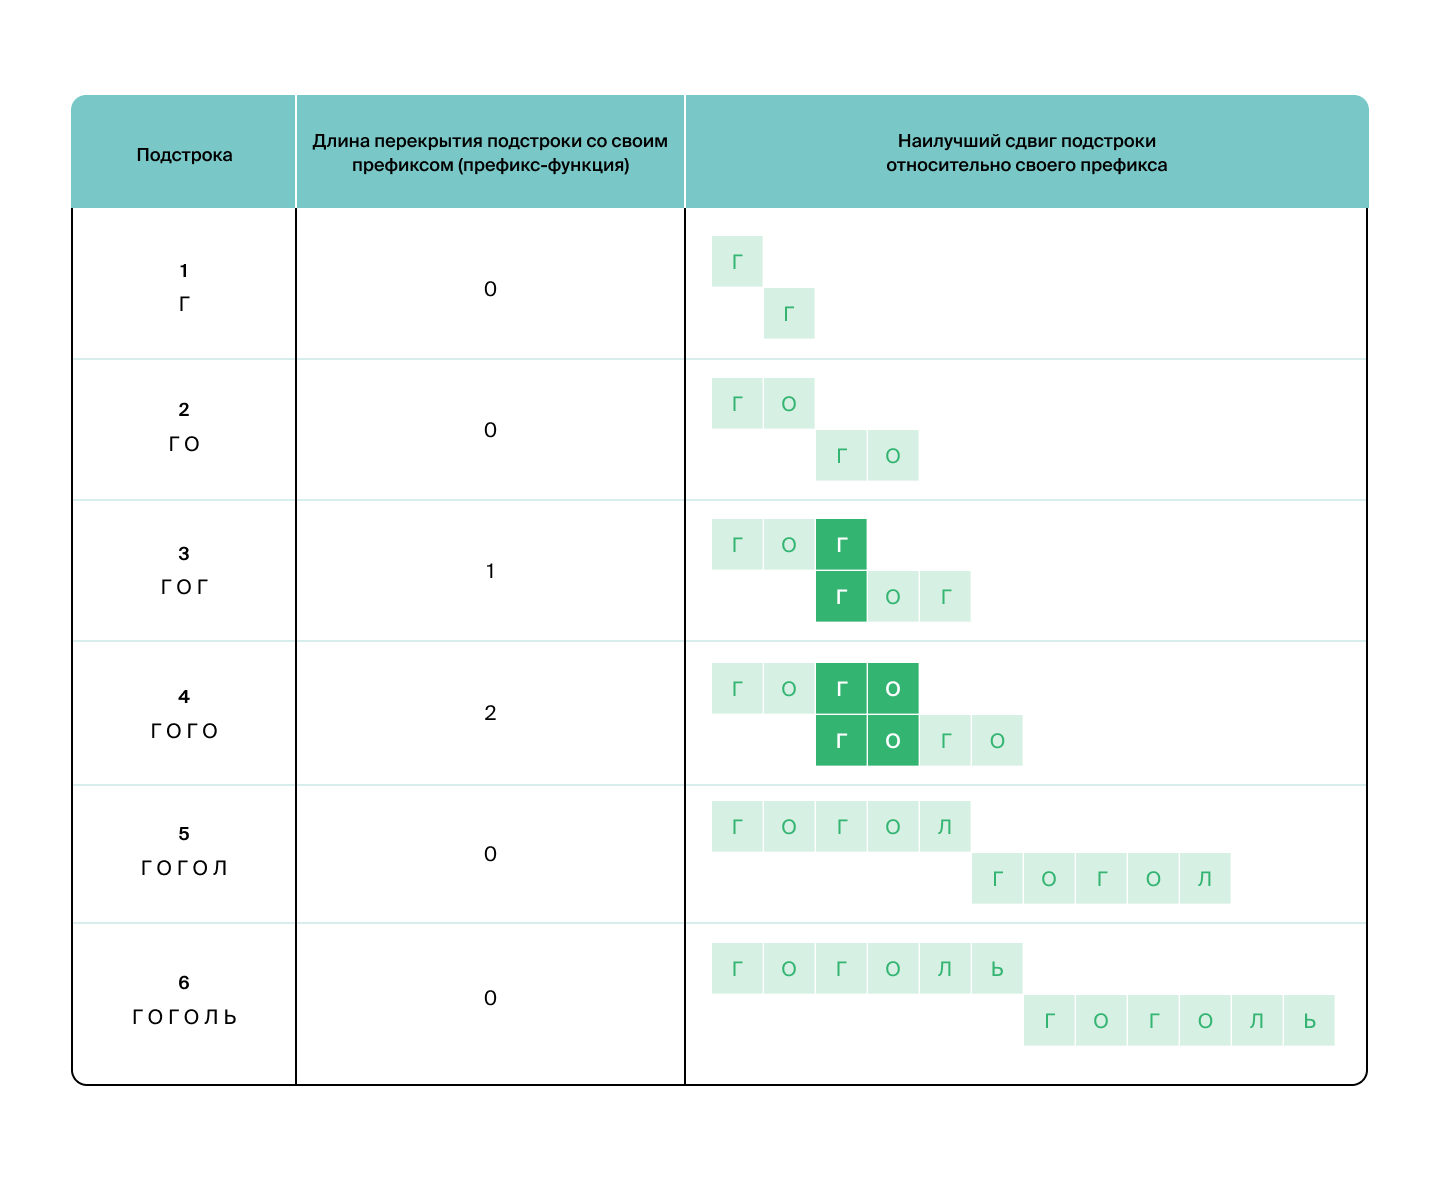

На иллюстрации показаны самоперекрытия префиксов длины от 1 до 6 (префикс длины 0 — это пустая строка, которая не может перекрываться с собой)
Чаще всего префикс-функция сразу вычисляется для всех возможных префиксов некоторой фиксированной строки ss, как в приведённом примере. Поэтому, несмотря на название, префикс-функция обыкновенно реализуется не одним числом, а массивом чисел длины ∣s∣∣s∣, в котором π[i−1]=π(s,i)π[i−1]=π(s,i):

π("ГОГОЛЬ") = [0, 0, 1, 2, 0, 0] 

Обратите внимание, что массив всегда начинается с нуля, ведь единственный собственный префикс любой строки длины 1 — это пустая строка. А последний элемент массива — это длина перекрытия с собой полной строки.
Рассмотрим ещё один пример. Посчитаем π(s)π(s) — префикс-функцию для строки s = 'ahahaha'.

    Для i=1i=1 значение будет 0, так как собственный суффикс строки из одного символа 'a' — пустая строка.
    Для i=2i=2 значение опять будет 0, так как для подстроки 'ah' её единственный собственный префикс не совпадает с её суффиксом, 'a' ≠ 'h'.
    Для i=3i=3 всё интереснее. У строки 'aha' есть суффикс 'a', который совпадает с префиксом строки. Длина этого суффикса — 1, так что π(s,3)=1π(s,3)=1.
    При i=4i=4 мы рассматриваем подстроку 'ahah'. У этой подстроки есть суффикс 'ah', который совпадает с префиксом 'ah' исходной строки. Длина этого префикса 2, следовательно, π(s,4)=2π(s,4)=2.
    При i=5i=5 смотрим на строку 'ahaha', её суффикс 'aha' совпадает с префиксом 'aha'. Длина этого суффикса — 3, так что π(s,5)=3π(s,5)=3.
    Аналогично, π(s,6)=4,  π(s,7)=5π(s,6)=4,π(s,7)=5.

В итоге для строки s = 'ahahaha' получили π(s)=[0,0,1,2,3,4,5]π(s)=[0,0,1,2,3,4,5].
Каким будет значение префикс-функции для строки s = "bubble"?
π(s)=[0,0,0,0,0,0]π(s)=[0,0,0,0,0,0]
Тоже правильный ответ
π(s)=[0,0,1,1,0,0]π(s)=[0,0,1,1,0,0]
Неправильный ответ
π(s)=[1,0,1,1,0,0]π(s)=[1,0,1,1,0,0]
Неверно. Массив префикс-функции всегда начинается с нуля. Подстроки "bub" и "bubb" начинаются и заканчиваются буквой 'b', значит π(s)=[0,0,1,1,0,0].π(s)=[0,0,1,1,0,0].
π(s)=[0,0,1,2,0,0]π(s)=[0,0,1,2,0,0]
Посчитайте префикс-функцию для строки s = "тет-а-тет".
π=[0,0,1,0,0,1,2,2,3]π=[0,0,1,0,0,1,2,2,3]
π=[0,1,0,0,0,1,2,3,0]π=[0,1,0,0,0,1,2,3,0]
Правильный ответ
π=[0,0,1,0,0,0,1,2,3]π=[0,0,1,0,0,0,1,2,3]
Верно! Префикс «тет» перекрывается c собой на одну букву «т» (на позиции 3 массива стоит 1). Также общее начало и завершение есть у префиксов «тет-а-т», «тет-а-те» и «тет-а-тет»; длины перекрытий составляют 1, 2 и 3 символа соответственно.
π=[1,2,3,0,0,0,1,2,3]π=[1,2,3,0,0,0,1,2,3] 
<a id="theory_5_end"></a>
[go back to the title](#title)

<a id="theory_6_start"></a>
## Вычисление префикс-функции
[go back to the title](#title)

Тимофей: - Вы уже умеете вычислять префикс-функцию на глаз. Теперь давайте посмотрим, как это мог бы делать компьютер.

### Наивный алгоритм вычисления префикс-функции
Сначала опишем наивный алгоритм. Для каждого префикса строки мы должны вычислить его перекрытие с собой. Будем перебирать все возможные длины перекрытий в порядке убывания и проверять, действительно ли префикс и суффикс проверяемой длины совпадают.

    N = length(s)
    #Создадим массив π, состоящий из N нулей.
    π = [0, 0, ...]

    для i от 1 до N:
        # i — длина подстроки-префикса.
        substring = s[0, i)
        # Проверяем, перекрывается ли подстрока substring с собой по k символам.
        для k от (i - 1) до 0:
            # Для этого сравним префикс и суффикс соответствующих длин.
            prefix = substring[0, k)
            suffix = substring[i - k, i)
            если prefix == suffix, то:
                π[i-1] = k  # Запишем значение π-функции.
                break       # Дальше не проверяем — k идёт в порядке уменьшения. 

Посчитаем сложность этого алгоритма. Фактически, в нём содержится три цикла:

    Внешний цикл перебирает длину ii подстроки-префикса s[0,i)s[0,i)​ от 11 до NN.
    Внутренний цикл итерируется по длине kk префикса s[0,k)s[0,k)​ и суффикса s[i−k,i)s[i−k,i)​ получившейся подстроки.
    Во внутреннем цикле неявно спрятан ещё один — посимвольное сравнение строк, которое выполняется за O(k)O(k).

Всё вместе это даёт кубическую сложность O(N3), что неприемлемо для длинных строк.
Однако можно посчитать префикс-функцию гораздо эффективнее, воспользовавшись методами динамического программирования.

### Эффективный алгоритм вычисления префикс-функции
Напомним, что πi=π[i] — это длина наибольшего самоперекрытия подстроки s[0,i+1), где 0⩽i<∣s∣.

Базовый случай будет, когда подстрока-префикс имеет длину 1: π0=0.

Предположим, что мы посчитали значение префикс-функции для всех длин префиксов от 0 до некоторого i−1. Наша задача теперь — вычислить πi.

Алгоритм будет искать такое перекрытие строки s[0,i), что его можно продолжить символом si.
Обозначим длину перекрытия за k. Тогда по определению перекрытия получим, что s[0,k)=s[i−k,i). Эти символы входят и в расширение перекрытия, перепроверять их не требуется. А дополняется перекрытие с одного конца символом si, с другого — символом sk. Это единственные два символа, которые нужно сравнить.
Чтобы выяснить, можно ли продолжить перекрытие, алгоритм проверяет, выполняется ли равенство sk=si. Если да, то префикс s[0,k) и суффикс s[i−k,i) продолжаются одной и той же буквой, а значит выполняется равенство s[0,k+1)=s[i−k,i+1). В этом случае мы можем записать, что πi=k+1.

Будем перебирать длины перекрытий, начиная от наибольшего. Самое длинное перекрытие даётся нам префикс-функцией от полной строки s[0,i): k1=πi−1. Каждое следующее перекрытие мы получаем как префикс-функцию от предыдущего перекрытия kj+1=π(s[0,kj))=π[kj−1]. Если некоторое перекрытие удаётся продолжить, то поиски следует прервать.
В какой-то момент может оказаться, что очередная проверяемая длина k равна нулю. Это значит, что не нашлось такого суффикса строки s[0,i), который совпадает с префиксом этой строки, и какой можно было бы продолжить символом si. В таком случае, новое перекрытие может получиться длиной 0 или 1:

    πi={1,  если  s[0]=s[i]
        0,  если  s[0]≠s[i]
        
Алла:- Спасибо! Вроде бы понятно, но давай я попробую повторить. Получается так:

    Мы начинаем считать префикс-функцию с первого элемента по порядку, то есть перебираем i=1…(N−1). В π[0] всегда кладём ноль.
    Чтобы узнать π[i]π[i], мы сравниваем элементы s[i] и s[k]. Для каждого i на первом шаге положим k=π[i−1].
    Если s[i]=s[k], то π[i]=k+1. Иначе обновляем k=π[k−1] и возвращаемся к предыдущему шагу алгоритма.
    Если в какой-то момент k=0, а ответ мы так и не нашли, то сравниваем первый символ с i-ым, и переходим к следующему i.

Тимофей-: Да, ты всё верно поняла, молодец. Алгоритм не из простых.
Гоша-: Я, кажется, тоже понял алгоритм, хотя он довольно сложный. Кажется, его реализация займёт много строк кода.
Тимофей-: Совсем нет. Код алгоритма получается достаточно компактным:

    функция prefix_function(s):
        # Функция возвращает массив длины |s|
        π = [0, None, None, ...]
        для i из [1 .. |s|):
            k = π[i - 1]
            пока (k > 0) и (s[k] ≠ s[i]):
                k = π[k - 1]
            если s[k] == s[i], то:
                k += 1
            π[i] = k
        вернуть π 

### Сложность алгоритма вычисления префикс-функции
Алла-: А почему сложность этого алгоритма линейная? Ведь, глядя на код, кажется, что сложность квадратичная: во внешнем цикле O(N) итераций, и на каждой выполняется внутренний цикл пока.
Тимофей-: Действительно, несмотря на вложенность, сложность алгоритма всё равно линейная. Сейчас расскажу, почему.

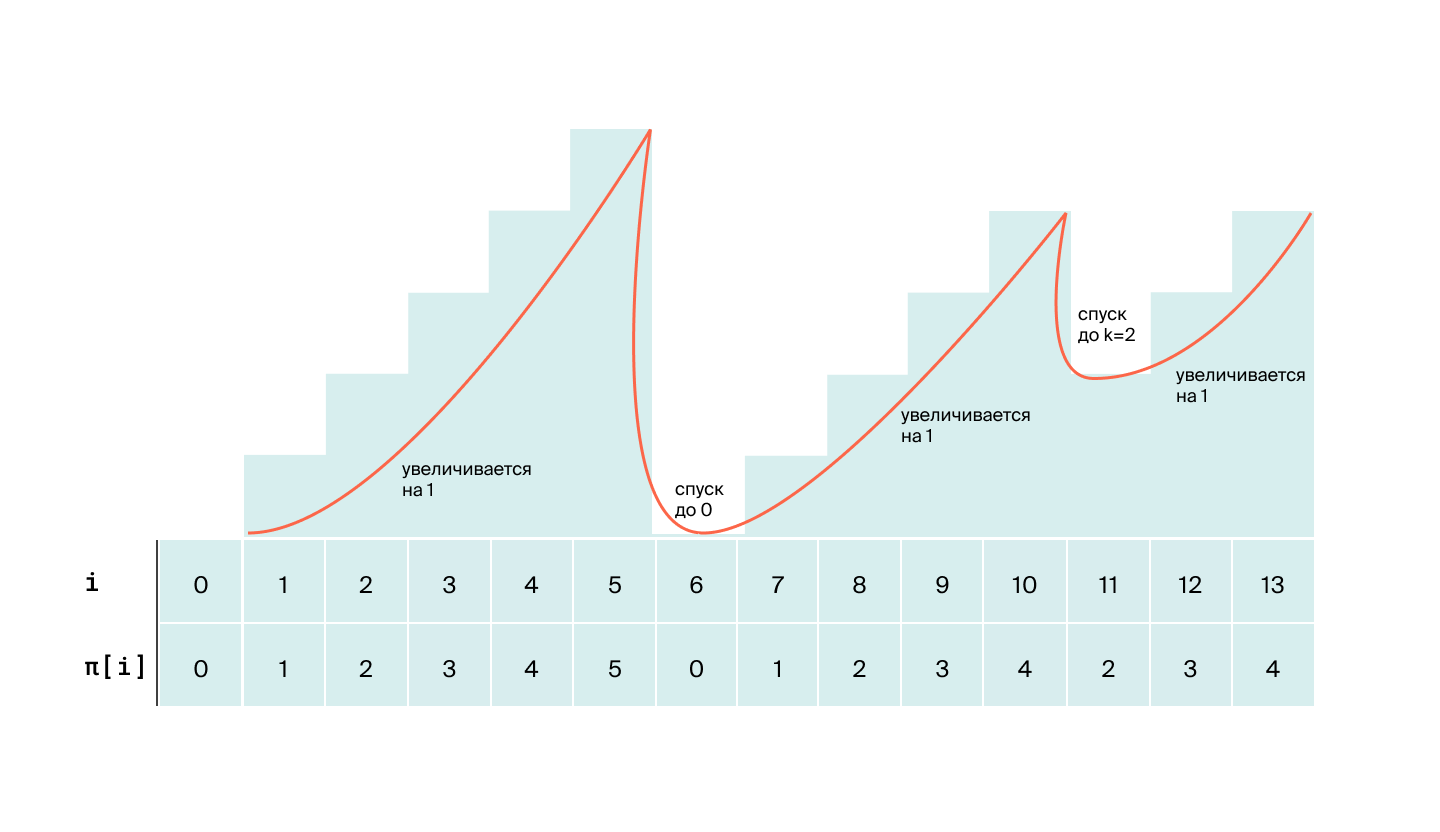
    Изменение значения префикс-функции с ростом длины префикса

Можно отметить важное свойство префикс-функции: π[i]⩽π[i−1]+1. То есть префикс-функция от следующего элемента может превосходить префикс-функцию от текущего не более, чем на 1.
Значение префикс-функции может увеличиваться на 1 или падать до нуля (или до какого-то числа k больше нуля).
При увеличении на 1 мы просто сравниваем два символа. Сложность O(1). А вот уменьшаться значение префикс-функции может в несколько этапов — именно за это отвечает цикл пока. На все спуски будет потрачено какое-то неизвестное нам количество операций.
Но значение префикс-функции не может упасть ниже нуля, поэтому суммарное количество падений не превзойдёт общее число подъёмов. А оно в свою очередь не может быть больше, чем N. Получаем, что и число увеличений, и число падений префикс-функции не превышают N, а значит суммарная сложность равна O(N).
В следующем уроке мы рассмотрим, как применять префикс-функцию для поиска шаблона в тексте.

<a id="theory_6_end"></a>
А пока решите задачу «[Подсчёт префикс-функции](#L)».

[go back to the title](#title)

<a id="theory_7_start"></a>
## Эффективный поиск шаблона в тексте

[go back to the title](#title)

Теперь рассмотрим алгоритм поиска подстроки в строке с использованием префикс-функции.

Пусть у нас есть шаблон p="pattern" и текст t="text". Обе строки состоят из символов некоторого алфавита Σ. Составим из них одну общую строку, разделённую символом-сентинелом.
Сентинел — специальный символ, который не содержится в алфавите Σ. Его используют, чтобы при конкатенации двух строк обозначить место склейки. Мы в качестве сентинела возьмём символ #.
Итак, у нас получилась строка ‘‘pattern#text". Именно от неё мы и будем вычислять префикс-функцию: π(‘‘pattern#text").
В качестве примера возьмём шаблон "sip" и текст "mississippi". Составим комбинированную строку "sip#mississippi" и вычислим от неё префикс-функцию.
Как мы говорили, каждая подстрока является суффиксом некоторого префикса. Значит, если шаблон встречается в строке, то на него оканчивается какой-то префикс. Тогда соответствующая подстрока должна иметь вид "pattern#…pattern". В нашем случае такой подстрокой окажется s[0,13).

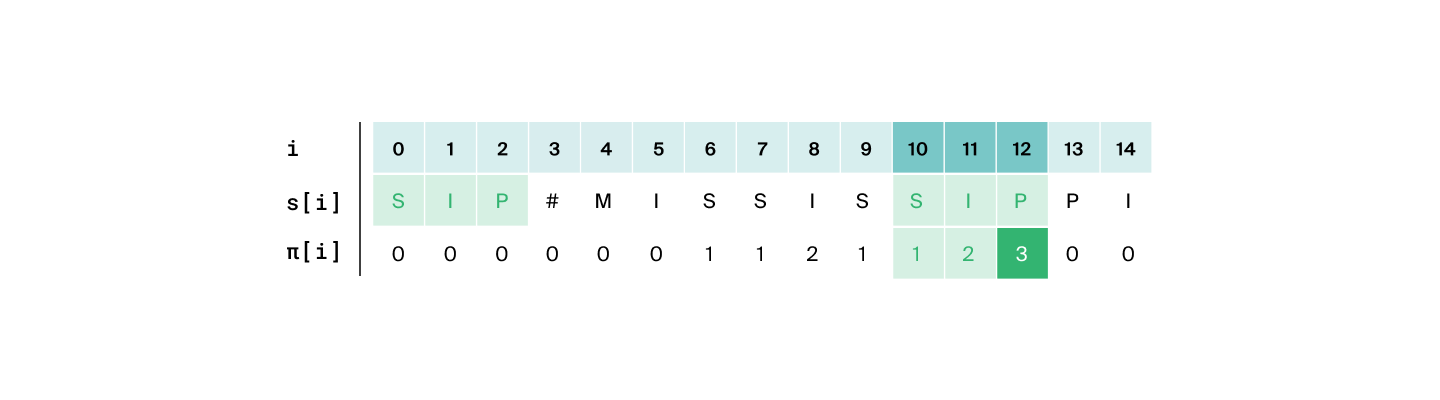

Вычислим значения префикс-функции для строки, полученной конкатенацией шаблона, сентинела и текста

Префикс-функция π12 от такого префикса будет равна длине шаблона ∣p∣. Это свойство любой позиции, на которой оканчивается вхождение шаблона. Значит, чтобы найти в тексте все вхождения шаблона, нам достаточно посчитать префикс-функцию комбинированной строки "pattern#text" и найти позиции, где она равна ∣p∣. Эти позиции будут соответствовать последней букве шаблона.

Стоит сказать, что ∣p∣ — это максимально возможное значение префикс-функции, ведь префикс большей длины обязательно захватывал бы сентинел, который встречается в строке лишь единожды. Чтобы суффикс начинался на ‘‘pattern#", он должен совпадать со всей строкой, но несобственные суффиксы в вычислении префикс-функции не участвуют.
В таком методе для поиска шаблона в тексте не требуется ничего, кроме вычисления префикс-функции.

### Эффективность алгоритма
Этот алгоритм состоит из двух шагов:

    построение префикс-функции,
    сканирование получившегося массива в поисках нужного значения.

Оба этапа занимают линейное время O(∣p∣+∣t∣). Это намного быстрее, чем O(∣p∣⋅∣t∣) — скорость работы наивного алгоритма.
Описанный метод требует O(∣p∣+∣t∣) дополнительной памяти для хранения значений префикс-функции. Впрочем, его возможно модифицировать так, чтобы он тратил только O(∣p∣) памяти. Для этого следует хранить префикс-функцию только от первых ∣p∣ символов комбинированной строки (то есть от той части строки, которая соответствует шаблону), а также префикс-функцию для последнего обрабатываемого элемента.
В таком случае построение префикс-функции и поиск её максимального значения будут совмещены. Промежуточные значения префикс-функции можно не запоминать: динамическое программирование всегда обращается только к последнему вычисленному значению префикс-функции и первым ∣p∣ значениям.

    функция поиск(p, text):
        # Функция возвращает все позиции вхождения шаблона в тексте.
        result = []
        s = p + '#' + text
        π = [0, None, None, ...]  # Массив длины |p|.
        π_prev = 0
        для i из [1 .. |s|):
            k = π_prev
            пока (k > 0) и (s[k] ≠ s[i]):
                k = π[k - 1]
            если s[k] == s[i], то:
                k += 1
            # Запоминаем только первые |p| значений π-функции.
            если i < |p|, то:
                π[i] = k
            # Запоминаем последнее значение π-функции.
            π_prev = k
            # Если значение π-функции равно длине шаблона, то вхождение найдено.
            если k == |p|, то:
                # i - это позиция конца вхождения шаблона.
                # Дважды отнимаем от него длину шаблона, чтобы получить позицию начала:
                #  - чтобы «переместиться» на начало найденного шаблона,
                #  - чтобы не учитывать добавленное "pattern#".
                result.добавить(i - 2 * |p|)
        вернуть result 

<a id="theory_7_end"></a>
Решите задачу «[Глобальная замена](#H)».

[go back to the title](#title)

<a id="theory_8"></a>
## Префиксное дерево
[go back to the title](#title)

В предыдущих уроках мы работали с одним текстом и одним шаблоном. А теперь давайте разберём методы, позволяющие работать сразу с большим набором шаблонов. Для этого нам понадобится структура данных, которая называется «бор», или «префиксное дерево». По-английски она называется вымышленным словом "trie". Это соединение слов "tree" — дерево, и "information retrieval" — поиск информации.

    Алла-: 
    А что из себя представляет это дерево и для каких задач используется?
    Тимофей
    Префиксное дерево хранит в себе набор слов. Каждое слово «прокладывает путь» по дереву от корня до некоторого узла. Рёбра в этом пути соответствуют отдельным символам слова.
Путь от корня до узла, соответствующей добавленному слову, проходит по цепочке узлов, каждый из которых соответствует префиксу исходного слова. Поэтому дерево и называют префиксным.
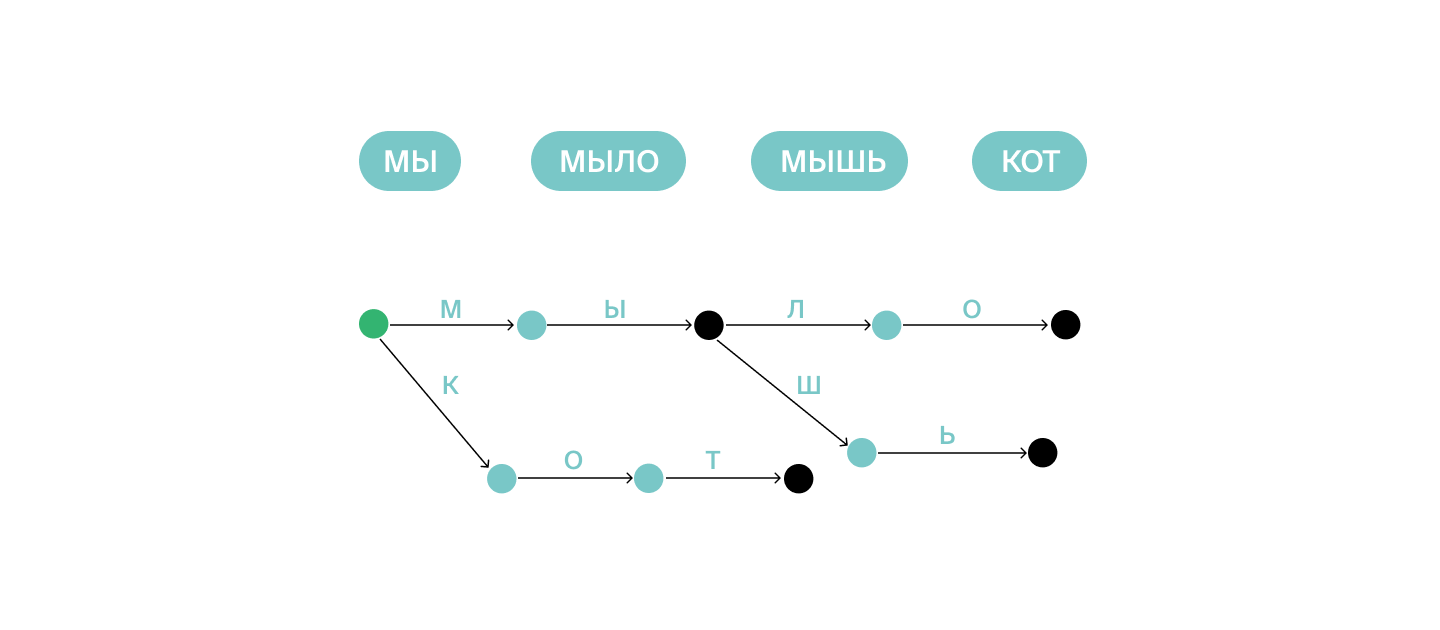

    Здесь изображён бор для множества слов: «мы», «мыло», «мышь», «кот». Чёрным цветом отмечены терминальные узлы. Узлы, покрашенные бирюзовым цветом, — промежуточные. Зелёным цветом отмечен корневой узел. Промежуточные узлы соответствуют префиксам «м», «мыш», «мыл», «к», «ко». Корень дерева соответствует пустой строке

В дереве есть два типа узлов. Терминальные узлы — это узлы, соответствующие словам, добавленным в бор. Терминальными, то есть конечными, их называют, поскольку в такие узлы ведут последние буквы слов. Но это не значит, что на терминальном узле ветка заканчивается, ведь некоторые слова можно дополнить до другого слова. Например, слово «мы» можно дописать до слова «мыло».
В терминальные узлы нередко записывают вспомогательную информацию про слово.
Помимо терминальных узлов в дереве есть промежуточные узлы. Они не соответствуют никакому слову, но являются префиксами для одного или нескольких слов, находящихся в боре.
### Как найти слово в префиксном дереве
При работе с префиксным деревом необходимо уметь быстро находить узел, соответствующий строке запроса. Для этого алгоритм стартует из корня и совершает переходы между узлами — символ за символом. Если узел в дереве отсутствует, алгоритм возвращает None:

    функция find_node(root, string):
        current_node = root
        для i от 0 до (length(string) - 1):
            symbol = string[i]  # На каждом шаге работаем с одним символом.

            если из current_node нет перехода по symbol:
                вернуть None

            # Сдвинуться на следующий символ.
            current_node = перейти из current_node по ребру symbol

        вернуть current_node 

Эффективность этого алгоритма поиска ключа (слова) зависит от способа хранения рёбер. Предположим, длина слова равна n. Мощность алфавита возможных символов — ∣Σ∣. Тогда каждый узел бора имеет не более, чем ∣Σ∣ рёбер и дочерних узлов.
Хранить переходы по бору можно одним из следующих способов:

    1. В списке рёбер {(symbol,next node);… }. Чтобы перейти к следующему узлу, нужно найти ребро, помеченное подходящим символом, а это требует полного перебора списка. При таком способе хранения сложность поиска узла, отвечающего строке, будет O(n⋅∣Σ∣).
    2. В сбалансированном бинарном дереве поиска. Сложность каждой из трёх операций — O(n⋅log⁡∣Σ∣). Алфавит Σ обычно небольшой, значит, алгоритм будет работать быстро.
    3. В хеш-таблице. Ключом будет символ, а значением — узел. Сложность поиска узла в этом случае будет равна O(n) в среднем.
    4. В массиве переходов длины ∣Σ∣: на позиции с индексом i будет храниться ссылка на ребро, отвечающее i-му символу алфавита. Тогда переход по каждому символу будет выполняться за константное время, а строка в целом будет обработана за O(n). По скорости этот метод оптимален, но при большом размере алфавита он будет расходовать много памяти.


Гоша: То есть в каждом узле хранится какая-то из перечисленных структур данных, да?
Тимофей: Верно.

Например, изобразим префиксное дерево, в котором переходы хранятся в виде списка рёбер:
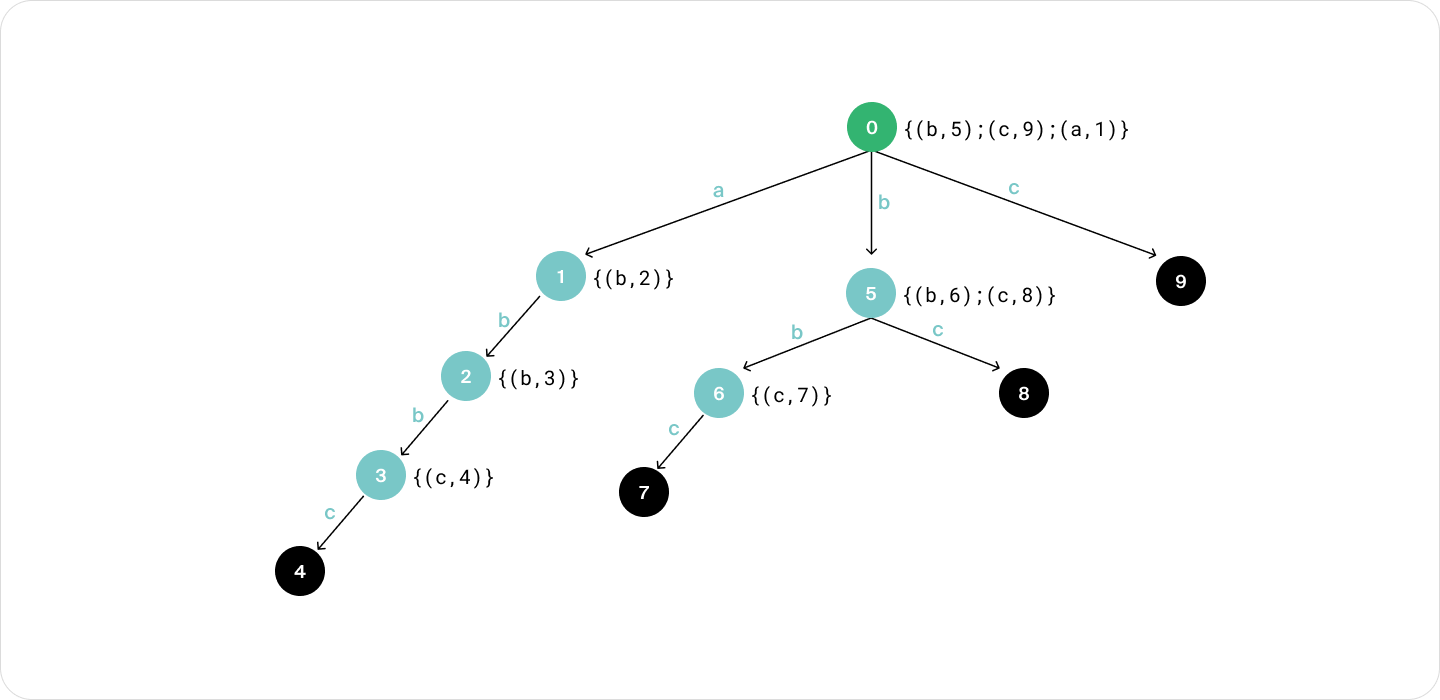

    В каждом узле записан список рёбер в формате {(символ, ссылка на следующий узел); ...}. Узлы пронумерованы, что позволяет хранить их в обыкновенном массиве, а в качестве ссылок использовать просто номера узлов. В это префиксное дерево записаны строки "abbc", "bbc", "bc", "c".
### Как построить префиксное дерево
Построить бор — означает записать в него набор слов. При добавлении слова алгоритм действует почти так же, как при поиске: пытается пройти по рёбрам от корня до узла, соответствующего добавляемой строке. Отличие в том, что если в процессе работы алгоритма какое-то ребро не будет найдено, алгоритм создаст необходимое ребро и перейдёт в только что созданный узел. Когда алгоритм дойдёт до итогового узла, тот станет терминальным.
Например, пусть в боре уже записано одно слово «мыло». Тогда при добавлении слова «мышь» алгоритм сделает два шага по существующим рёбрам и дойдёт до узла, соответствующего подстроке «мы». А вот для буквы «ш» ребра нет, поэтому оно будет создано — вместе с новым узлом. Затем будет создано ребро для буквы «ь» и ещё один — на этот раз терминальный — узел.
Следующим мы запишем слово «мы». Для каждой буквы найдётся ребро в дереве, поэтому добавлять новые не нужно. Алгоритм дойдёт до соответствующего узла и отметит, что он терминальный. Теперь бор знает, что «мы» — не просто префикс слов «мыло» и «мышь», а самостоятельное слово.
Наконец добавим слово «кот». Уже на первом шаге потребуется добавить новое ребро, так как слов на букву «к» нам пока не встречалось. Так будут созданы обыкновенные узлы «к», «ко» и терминальный узел «кот».
Запишем алгоритм в виде псевдокода:

    функция add_string(root, string):
        current_node = root
        для i от 0 до (length(string) - 1):
            symbol = string[i]  # На каждом шаге работаем с одним символом.

            если из current_node нет перехода по symbol:
                создать узел new_node
                создать ребро symbol из current_node в new_node

            # Сдвинуться на следующий символ.
            current_node = перейти из current_node по ребру symbol

        пометить current_node как терминальный узел
        вернуть current_node 

Какая сложность алгоритма построения бора по заданному набору слов?
O(L), где L — суммарная длина слов во множестве

### Применение префиксного дерева
    Алла
    Как строить бор — понятно. А для каких задач его используют?
    Тимофей
    Префиксное дерево, построенное из множества слов-шаблонов {pi}, поможет быстро проверить, входит ли некоторая строка ss в это множество или нет.
    
Например, мы можем добавить в префиксное дерево все слова русского языка. Это позволит нам создать функцию проверки орфографии, которая будет находить слово s в словаре (если оно там есть). В качестве бонуса функция будет предлагать варианты автодополнения.
Чтобы выполнить такую проверку, нужно по слову найти узел в префиксном дереве, как мы уже делали это ранее. После чего следует отыскать все терминальные узлы, являющиеся потомками найденного узла.
Итак, мы будем перебирать по очереди все символы строки ss, начиная с корня и спускаясь по бору вниз. Далее возможны три случая:

    1. Если какого-то из переходов не нашлось, значит, строки ss в боре нет. Для нашей задачи это означает, что слово ss не встречается в словаре и не является префиксом никакого из слов. Поэтому дополнить это слово невозможно.
    2. Если переходы по каждому из символов нашлись, то в конце нужно проверить, является ли узел терминальным.
    (а) Если да, значит, искомая строка принадлежит множеству: s∈{pi} и является словарным словом.
    (б) Если нет, то искомая подстрока — префикс одной или более строк данного множества. Например, для строки «к» в боре существует узел (он расположен на пути к узлу «кот»), но он не является терминальным.
    В обоих случаях возможно предложить варианты автодополнения. Для этого следует найти все терминальные узлы, являющиеся потомками узла, на котором остановился алгоритм.

Напомним, что у терминального узла тоже могут быть потомки, в том числе терминальные. Например, слово «мы» есть в словаре, и оно имеет в качестве потомков слова «мышь» и «мыло», которые будут предложены в качестве вариантов автодополнения.
Сложность проверки линейно зависит от длины проверяемого слова.

### Поиск сложного шаблона в строке
    Гоша
    Хорошо, мы разобрались, как искать строку среди множества шаблонов. Но может ли префиксное дерево помочь нам в противоположной задаче: найти шаблон в строке?
    Рита
    Нет, для этой задачи лучше воспользоваться алгоритмом Кнута-Морриса-Пратта.
    Тимофей
    Но есть похожая задача, в которой бор может быть полезен. Давайте будем искать в тексте не одну строку, а сразу несколько слов или подстрок. Например, любое из слов: «кот», «котик», «кошак», «кошка», «кошечка».
    Можно сказать, что теперь шаблон, который мы ищем в тексте — это не строка, а набор строк: (кот|котик|кошак|кошка|кошечка).
    Гоша
    А почему бы просто не воспользоваться алгоритмом поиска для каждой из подстрок?
    Тимофей
    Так сделать можно, но это решение окажется не самым эффективным. Ведь тогда нам придётся сравнивать текст с каждым шаблоном. Это займёт O(n⋅L) операций, где n — длина текста, L=∑imi — сумма длин всех шаблонов.
    
Но ведь шаблоны не являются независимыми. Если мы видим, что в шаблоне «кошка» совпали 3 символа, то в шаблонах «кошак» и «кошечка» первые три символа можно уже не проверять, они тоже совпадут со строкой. Шаблоны «кот» и «котик» тоже можно не проверять: они точно уже не подойдут в данной позиции. Получается, шаблоны взаимосвязаны. На этом соображении основан метод, который позволяет искать в тексте несколько различных подстрок не поочерёдно, а одновременно.
    
Вначале мы составим бор, в который входят все строки, которые мы собираемся искать. Этот бор и будет играть роль шаблона. Затем мы модифицируем наивный алгоритм поиска строк. Как и прежде, мы будем по одной перебирать стартовые позиции, к которым можно «приложить» шаблон. Но проверять на каждом шаге мы теперь будем не одну подстроку, а весь шаблон в целом. Символы строки будут задавать путь по префиксному дереву. Если путь по существующим рёбрам дерева проложить не удаётся, шаблон в текущей стартовой позиции не подходит. Если же алгоритм в процессе движения по рёбрам дошёл до одного из терминальных узлов, шаблон найден.
Запишем это в виде псевдокода:

    функция find_any(text, patterns):
        построить префиксное дерево trie по набору шаблонов patterns
        для pos от 0 до (length(text) - 1):  # Перебираем стартовые позиции.
            # Начинаем с корня бора.
            current_node = корень дерева trie  
            # Перебираем символы шаблона, начиная со стартовой позиции.
            offset = 0
            mismatch_not_found = True  # Расхождений с шаблоном пока не найдено.   
            пока mismatch_not_found и (pos + offset) < length(text):
                symbol = text[pos + offset]
                если из current_node есть переход по symbol:
                    # Сдвинуться на следующий символ.
                    current_node = перейти из current_node по ребру symbol
                    если current_node - терминальный узел:
                        вернуть pos
                    offset += 1
                иначе:  # Подходящее ребро отсутствует.
                    # Найдено разночтение, мы должны завершить сканирование шаблона
                    #   на текущей стартовой позиции. Внутренний цикл прервётся.
                    # Работа на этом не заканчивается: 
                    #   будет взята следующая стартовая позиция.
                    mismatch_not_found = False
        # Ни на одной стартовой позиции мы не дошли до терминального узла,
        #   значит, шаблон не найден.
        вернуть -1 

В худшем случае от каждой позиции текста алгоритму придётся пройти по самой длинной ветви бора, поэтому такой способ займёт O(n⋅M) операций, где n — длина текста, а M=max⁡mi — длина самого длинного из искомых шаблонов. Поэтому алгоритм серьёзно экономит время, когда в вашем распоряжении много коротких шаблонов.

<a id="theory_8_end"></a>
Решите задачу: «[Случай верблюда](#J)».


[go back to the title](#title)

<a id="theory_9"></a>
## Разбор задачи «Быстрое сравнение двух строк»
[go back to the title](#title)

Задача сравнения двух строк решается достаточно просто за линейное время: если надо сравнить строки ss и tt, то достаточно найти их наибольший общий префикс и посмотреть на первый различающийся символ, если такой есть, или заключить, что одна строка является префиксом другой. Результат операции сравнения можно представить в виде числа. Если s<ts<t, то результат равен -1, если s=ts=t, то 0, если s>ts>t, то 1.
Теперь расширим эту задачу. Пусть нам дан набор, состоящий из nn строк. Наша задача — научиться быстро отвечать на запросы вида «сравнить строки ss и tt из этого набора». Заодно разберёмся, что в данном случае значит «быстро».
### Наивное решение
Наиболее простой подход состоит в том, чтобы применять обычный алгоритм сравнения двух строк. Тогда отвечать на запрос мы будем за O(L)O(L), где LL — длина самой длинной строки.
Если запросов будет поступать много, то имеет смысл воспользоваться кешированием ответов.
Кеширование — это техника запоминания уже запрошенных данных и полученных ответов на запросы. Например, в ленивом динамическом программировании мы сохраняли ответы для однажды посчитанных состояний, чтобы не пересчитывать их повторно.
В рассматриваемой задаче, сохраняя ответы для каждой запрашиваемой пары строк, мы сэкономим время на повторяющихся запросах, но увеличим пространственную сложность. На хранение всех результатов уйдет O(n2)O(n2) дополнительной памяти, так как всего пар n(n−1)22n(n−1)​, и для каждой надо сохранить одно число — результат сравнения (-1, 0 или 1). Время работы на подсчёт ответов для всех пар составит O(n2L)O(n2L).

### Улучшаем решение
Теперь научимся быстрее обрабатывать каждый запрос по отдельности. Рассмотрим утверждение для некоторого числа ii и двух строк ss и tt: «Префиксы длины ii строк ss и tt совпадают».
Заметим, что это утверждение до некоторого значения ii истинно, но, начиная с некоторого ii, ложно. Например, для строк s="abacaba"s="abacaba" и t="abadaba"t="abadaba" при i=1,2,3i=1,2,3 утверждение верно, а при i≥4i≥4 ложно.
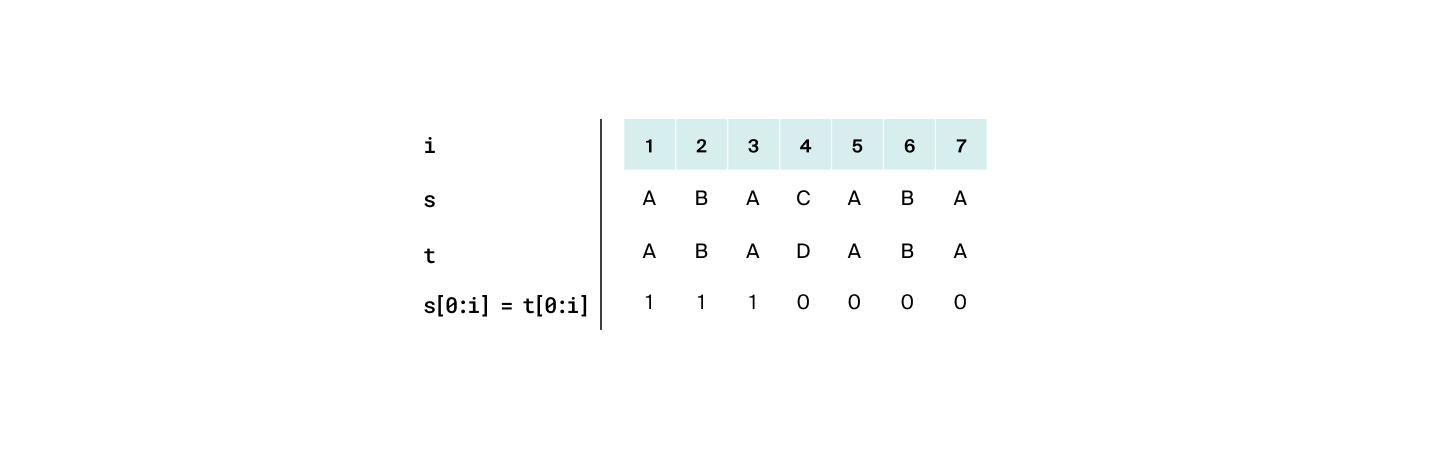

Такое свойство некоторого условия называется «монотонностью». На самом деле мы уже имели дело с этим свойством, когда говорили о бинарном поиске.
Бинарный поиск может применяться только на монотонных данных. Помните, мы разбирали поиск по словарю? Записи в нём упорядочены лексикографически — именно это и есть монотонность, благодаря которой мы успешно применили бинарный поиск и нашли нужное нам слово.
Обозначим T(k)T(k) — время на сравнение двух префиксов длины kk на точное равенство. Тогда первую позицию, в которой строки ss и tt различаются, можно искать бинарным поиском за O(T(L)⋅log⁡L)O(T(L)⋅logL). Теперь подумаем, как можно сравнивать префиксы эффективно. Если сравнивать их наивно, за линейное время, T(k)=O(k)T(k)=O(k), то толку от использования бинарного поиска не будет.
Допустим, для строк ss и tt заранее вычислены массивы префиксных хешей. Тогда сравнить два префикса длины kk можно за константное время O(1)O(1), обратившись к нужному префиксному хешу для каждой строки. Значит, сравнить строки ss и tt мы можем за O(log⁡L)O(logL) при условии, что префиксные хеши уже посчитаны.
Мы готовимся к тому, что запросов будет приходить много, поэтому выгодно посчитать префиксные хеши заранее, сделав предподсчёт. Префиксный хеш одной строки ss вычисляется за O(∣s∣)O(∣s∣), поэтому суммарно это займёт O(nL)O(nL) времени, что сопоставимо с затратами на считывание строк. На хранение хешей уйдёт O(nL)O(nL) дополнительной памяти. Зато время ответа на каждый запрос улучшилось с O(L)O(L) до O(log⁡L)O(logL)!

    all_strings = ...  # Считываем n строк.
    n = len(all_strings)

    # Вычисляем префиксные хеши.
    # Как это делать -- изучали в спринте 4.  :)
    hashes = [get_hashes(s) for s in all_strings]
    # В hashes[i] лежит массив префиксных хешей для i-ой строки.

    queries = ...  # Считываем все запросы.
    # Каждый запрос состоит из пары индексов строк, которые нужно сравнить.

    for i, j in queries:
        # Итерация цикла сравнивает i-ую и j-ую строки.
        # В цикле перебираются пары индексов.
        s = all_strings[i]
        t = all_strings[j]

        # -- Бинарный поиск позиции первого различия --
        # Будем думать про left, mid и right как про длины общих префиксов.
        # Изначально мы можем гарантировать сопадение только нулевой длины.
        left = 0
        # Заведомо недостижимый ответ. Это, например, длина строки + 1.
        right = min(len(s), len(t)) + 1
        while right - left > 1:
            # Получаем середину.
            mid = (left + right) // 2
            # Так как mid - это длина, то [mid-1] - индекс последнего символа.
            if hashes[i][mid - 1] == hashes[j][mid - 1]:
                # Так как при длине префиксов mid они совпадают,
                # то передвигаем left.
                left = mid
            else:
                # Иначе при длине mid совпадения нет,
                # сдвигаем right ближе к началу.
                right = mid

        # Рассмотрим случай, когда строки оказались равны.
        if left == len(s) and left == len(t):
                result = 0
        # Теперь одна из строк является точным префиксом другой.
        elif mid == len(s):
            result = -1
        elif mid == len(t):
            result = 1
        else:
            # Если длина совпадающего префикса равна left, 
            # то первый различающийся элемент стоит на позиции left.
            if s[left] < t[left]:
                result = -1
            else:
                result = 1

        print(result) 

Итого, используя алгоритм с предподсчётом префиксных хешей, мы получаем асимптотику O(nL+Qlog⁡L)O(nL+QlogL), если нам поступает QQ запросов на сравнение пары строк. Иногда для алгоритма отдельно записывают время на предподсчёт и время ответа на запрос. В данном случае предподсчёт занял бы O(nL)O(nL), а ответ на каждый запрос O(log⁡L)O(logL).
Если бы мы захотели ещё улучшить рассмотренный алгоритм, то можно было бы добавить кеширование ответов. Проанализируем время работы алгоритма с добавленным кешированием. Предподсчёт хешей займёт O(nL)O(nL), затем на вычисление ответов для всех пар потребуется O(n2log⁡L)O(n2logL) операций, далее ответ на любой запрос выполняется за O(1)O(1). Затраты на память составили бы O(nL)O(nL) на префиксные хеши плюс O(n2)O(n2) на кеш ответов.
Вопрос. Возможно ли подобрать две неравных строки ss и tt таких, чтобы их полиномиальные хеши совпадали? Стоит ли учитывать это при решении задачи?

<a id="tasks"></a> 
## Промежуточные задачи. 
[go back to the title](#title) 

Ссылка на контекст: https://contest.yandex.ru/contest/26131/problems/

<a id=A></a> 
### A. Разворот строки
[go back to the title](#title) || [go to the theory](#theory_1_end)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.1 секунда 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    C# (MS .Net 5.0)+ASP 	0.3 секунды 	64Mb
    Python 3.6 	0.3 секунды 	64Mb
    Oracle Java 8 	0.3 секунды 	64Mb
    OpenJDK Java 11 	0.3 секунды 	64Mb

В некоторых языках предложения пишутся и читаются не слева направо, а справа налево.

Вам под руку попался странный текст –— в нём обычный (слева направо) порядок букв в словах. А вот сами слова идут в противоположном направлении. Вам надо преобразовать текст так, чтобы слова в нём были написаны слева направо.
### Формат ввода

На ввод подаётся строка, состоящая из слов, разделённых пробелами (один пробел между соседними словами). Всего слов не более 1000, длина каждого из них —– от 1 до 100 символов. Слова состоят из строчных букв английского алфавита.
### Формат вывода

Выведите строку с обратным порядком слов в ней.
### Пример:
    Ввод/Вывод

    one two three
    three two one

    Ввод/Вывод

    hello
    hello

    Ввод/Вывод

    may the force be with you
    you with be force the may


In [2]:
# code A
string = input()

list_a = string.split()
# print(list_a)
list_a = reversed(list_a)
print(*list_a)

aa ddd ff
['aa', 'ddd', 'ff']
ff ddd aa


<a id=B></a> 
### B. Пограничный контроль
[go back to the title](#title) || [go to the theory](#theory_2_end)
 
    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.2 секунды 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    C# (MS .Net 5.0)+ASP 	0.4 секунды 	64Mb
    Oracle Java 8 	0.4 секунды 	64Mb
    OpenJDK Java 11 	0.4 секунды 	64Mb

Представьте, что вы работаете пограничником и постоянно проверяете документы людей по записи из базы. При этом допустима ситуация, когда имя человека в базе отличается от имени в паспорте на одну замену, одно удаление или одну вставку символа. Если один вариант имени может быть получен из другого удалением одного символа, то человека пропустят через границу. А вот если есть какое-либо второе изменение, то человек грустно поедет домой или в посольство.

Например, если первый вариант —– это «Лена», а второй — «Лера», то девушку пропустят. Также человека пропустят, если в базе записано «Коля», а в паспорте — «оля».

Однако вариант, когда в базе числится «Иннокентий», а в паспорте написано «ннакентий», уже не сработает. Не пропустят также человека, у которого в паспорте записан «Иинннокентий», а вот «Инннокентий» спокойно пересечёт границу.

Напишите программу, которая сравнивает имя в базе с именем в паспорте и решает, пропускать человека или нет. В случае равенства двух строк — путешественника, естественно, пропускают.
### Формат ввода

В первой строке дано имя из паспорта.

Во второй строке —- имя из базы.

Обе строки состоят из строчных букв английского алфавита. Размер каждой строки не превосходит 100 000 символов.
### Формат вывода

Выведите «OK», если человека пропустят, или «FAIL» в противном случае.
### Пример:
    Ввод/Вывод:
    abcdefg
    abdefg

    OK

    Ввод/Вывод:
    helo
    hello

    OK

    Ввод/Вывод:
    dog
    fog

    OK

    Ввод/Вывод:
    mama
    papa

    FAIL

In [43]:
# code B

a = input()
b = input()

def compare(a, b):
    len_a = len(a)
    len_b = len(b)

    cnt = 0
    if len_a == len_b:
        for i in range(len_a):
            if a[i] != b[i]:
                cnt += 1
    else:
        if len_a < len_b:
            a, b = b, a
            len_a, len_b = len_b, len_a

        if len_a - len_b > 1:
            return 'FAIL'
        else:
            for i in range(len_a): 
                if a[i] == b[i-cnt]:
                    pass
#                     print('okeushki')
                else:
                    cnt += 1
    if cnt > 1:
        return 'FAIL'
    else:
        return 'OK'

print(compare(a, b))


adfsdhf
fghjfj


<a id=C></a> 
### C. Самый длинный палиндром 2
[go back to the title](#title)
 
    Ограничение времени 	1 секунда
    Ограничение памяти 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Палиндром —– это строка, которая одинаково читается как слева направо, так и справа налево.

Из данной строки s путём удаления и перестановки букв надо получить палиндром максимальной длины. Среди всех таких палиндромов надо получить лексикографически минимальный. Количество удалений и перестановок символов может быть любым.
### Формат ввода

В единственной строке дана строка s. Длина строки |s| ≤ 10^5. Строка состоит из строчных букв английского алфавита.
### Формат вывода

Выведите полученный палиндром. Заметьте, что ответ определяется однозначно.
### Пример:
    Ввод/Вывод: aaaabb / aabbaa
 
    Ввод/Вывод: pabcd / a

    Ввод/Вывод: aaabbb / ababa

In [12]:
# code C
abc = input()

abc2 = sorted(list(abc))

dict_a = {}

for item in abc2:
    dict_a

r_out = list(reversed(out))
if i < len(abc2):
    print(*out, abc2[i], *r_out, sep='')
else:    
    print(*out, *r_out, sep='')
    

aaaabbd;j;lkj
aaaabbd;j;lkj
[';', ';', 'a', 'a', 'a', 'a', 'b', 'b', 'd', 'j', 'j', 'k', 'l']
;aabjljbaa;


In [4]:
print(abc2[10])

s


<a id=D></a> 
### D. Общий префикс
[go back to the title](#title)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	1 секунда 	128Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Node.js 14.15.5 	2 секунды 	128Mb
    Python 3.7.3 	5 секунд 	64Mb
    C# (MS .Net 5.0)+ASP 	2 секунды 	256Mb
    Mono C# 5.2.0 	2 секунды 	256Mb
    Oracle Java 8 	2 секунды 	256Mb
    OpenJDK Java 11 	2 секунды 	256Mb
    Node JS 8.16 	2 секунды 	128Mb

Найдите наибольший по длине общий префикс нескольких строк.
### Формат ввода

В первой строке дано число n (1 ≤ n ≤ 105). Затем по одной на строке даны n строк, каждая не превышает 105 в длину. Суммарная длина всех строк не превосходит 107.
### Формат вывода

Выведите единственное число — длину наибольшего префикса всех данных строк.
### Пример:
    Ввод
    Вывод

    3
    abacaba
    abudabi
    abcdefg



    2

    Пример 2
    Ввод
    Вывод

    2
    tutu
    kukuku



    0

    Пример 3
    Ввод
    Вывод

    3
    qwe
    qwerty
    qwerpy


In [29]:
# code D
def polihash_array(string, q, m):
    hash_array = [0]
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
        hash_array.append(hash_sum)

    return hash_array        


n = int(input())
strings = [None] * n
for i in range(n):
    strings[i] = input()
        
a = 123
m = 100003
first = strings[0]
max_len = len(first)
first_hash = polihash_array(first, a, m)
first_len = len(first)
# print(first, first_len, first_hash)
for stroka in strings[1:]:
    second_hash = polihash_array(stroka, a, m)
    left = 0
    right = min(max_len, first_len, len(stroka)) + 1
#     print('left', left, 'right', right, stroka, second_hash)  
    while right - left > 1:
        mid = (right + left) // 2
#         print('start mid', mid, 'left', left, 'right', right)
        if first_hash[mid] == second_hash[mid]:
            left = mid
        else:
            right = mid
#         print('end mid', mid, 'left', left, 'right', right)
    max_len = left   
    first_hash, second_hash = second_hash, first_hash
    first_len = len(stroka)
#     print('max_len:', max_len)

    
print(max_len)

# 3
# abacaba
# abudabi
# abcdefg

# 2
# tutu
# kukuku

# bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaakrrlhlhpj
# bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaaiiitt

2
tutu
kukuku
tutu 4 [0, 116, 14385, 69420, 38522]
0


In [24]:
aa = 'bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaaiiitt'
print(aa[0:68])

bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaa


<a id=E></a> 
### E. Вставка строк 
[go back to the title](#title) || [go to the theory](#theory_1_end)
 
	Все языки 	GNU c++17 7.3
    Ограничение времени 	1 секунда 	0.2 секунды
    Ограничение памяти 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

У Риты была строка s, Гоша подарил ей на 8 марта ещё n других строк ti, 1≤ i≤ n. Теперь Рита думает, куда их лучше поставить. Один из вариантов —– расположить подаренные строки внутри имеющейся строки s, поставив строку ti сразу после символа строки s с номером ki (в частности, если ki=0, то строка вставляется в самое начало s).

Помогите Рите и определите, какая строка получится после вставки в s всех подаренных Гошей строк.
### Формат ввода

В первой строке дана строка s. Строка состоит из строчных букв английского алфавита, не бывает пустой и её длина не превышает 105 символов.

Во второй строке записано количество подаренных строк — натуральное число n, 1 ≤ n ≤ 10^5.

В каждой из следующих n строк через пробел записаны пары ti и ki. Строка ti состоит из маленьких латинских букв и не бывает пустой. ki — целое число, лежащее в диапазоне от 0 до |s|. Все числа ki уникальны. Гарантируется, что суммарная длина всех строк ti не превосходит 10^5.
### Формат вывода

Выведите получившуюся в результате вставок строку.
### Пример:
    Ввод/Вывод:
    abacaba
    3
    queue 2
    deque 0
    stack 7

    dequeabqueueacabastack

    Ввод/Вывод:
    kukareku
    2
    p 1
    q 2
    
    kpuqkareku

In [39]:
# code E
#Вставить строку substring в строку string перед позицией index.
# def insert(string, index, substring):
#     length = len(string)
#     shift = len(substring)
#     if index > length: # index == length - край строки
#         raise error

#     расширить область памяти строки до размера length + shift
#     if length > 0:
#         for i in range(length - 1, index, -1):
#             string[shift + i] = string[i]

#     for i in range(0, shift - 1):
#         string[index + i] = substring[i]

testmode = False
if testmode:
    string = 'abacaba'
    n = 3
    mylist = ['queue 2', 'deque 0', 'stack 7']
    str_arr = [None] * n
    for i in range(n):
        substr, index = mylist[i].split()
        print(substr, index)
        str_arr[i] = ((int(index), substr))
        
else:
    string = input()
    n = int(input())
    str_arr = [None] * n
    for i in range(n):
        substr, index = input().split()
        str_arr[i] = ((int(index), substr))
        
# print(str_arr)
new_str =  []
i = 0
for substr in sorted(str_arr):
    index = substr[0]
    substring = substr[1]
    if index <= len(string):    
        new_str.append(string[i:index])
        new_str.append(substring)
        i = index
    else:
        break
if index <= len(string):
    new_str.append(string[index:])
    
print(*new_str, sep='')
# Входной файл
# kukareku
# 2
# p 1
# q 2


kukareku
2
p 1
q 2
[(1, 'p'), (2, 'q')]
kpuqkareku


<a id=F></a> 
### F. Частое слово
[go back to the title](#title)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.6 секунд 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    C# (MS .Net 5.0)+ASP 	0.6 секунд 	128Mb
    Mono C# 5.2.0 	0.6 секунд 	128Mb
    Oracle Java 8 	0.6 секунд 	128Mb
    OpenJDK Java 11 	0.6 секунд 	128Mb

Дан набор слов, слова могут повторяться. Среди них надо найти самое частое слово. Если таких слов несколько, то выведите лексикографически наименьшее.
### Формат ввода

В первой строке дано число n (1 ≤ n ≤ 103) — количество строк. В следующих n строках даны слова, состоящие из строчных букв английского алфавита. Слово не бывает пустым. Суммарная длина слов не превосходит 107. Длина одного слова не превосходит 105.
### Формат вывода

Выведите единственную строку – наиболее частое слово, лексикографически минимальное, если самых частых слов несколько.
### Пример:
    Ввод
    Вывод

    5
    caba
    aba
    caba
    abac
    aba



    aba

    Пример 2
    Ввод
    Вывод

    3
    b
    bc
    bcd



    b

    Пример 3
    Ввод
    Вывод

    10
    ciwlaxtnhhrnenw
    ciwnvsuni
    ciwaxeujmsmvpojqjkxk
    ciwnvsuni
    ciwnvsuni
    ciwuxlkecnofovq
    ciwuxlkecnofovq
    ciwodramivid
    ciwlaxtnhhrnenw
    ciwnvsuni



    ciwnvsuni


In [ ]:
# code F

<a id=G></a> 
### G. Поиск со сдвигом
[go back to the title](#title) || [go to the theory](#theory_4_end)

	Все языки 	Python 3.7.3 	GNU c++17 7.3
    Ограничение времени 	1.5 секунд 	3 секунды 	0.15 секунд
    Ограничение памяти 	64Mb 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Гоша измерял температуру воздуха n дней подряд. В результате у него получился некоторый временной ряд. Теперь он хочет посмотреть, как часто встречается некоторый шаблон в получившейся последовательности. Однако температура — вещь относительная, поэтому Гоша решил, что при поиске шаблона длины m (a1, a2, ..., am) стоит также рассматривать сдвинутые на константу вхождения. Это значит, что если для некоторого числа c в исходной последовательности нашёлся участок вида (a1 + c, a2 + c, ... , am + c), то он тоже считается вхождением шаблона (a1, a2, ..., am).

По заданной последовательности измерений X и шаблону A=(a1, a2, ..., am) определите все вхождения A в X, допускающие сдвиг на константу.

Подсказка: если вы пишете на питоне и сталкиваетесь с TL, то попробуйте заменить какие-то из циклов операциями со срезами.
### Формат ввода

В первой строке дано количество сделанных измерений n — натуральное число, не превышающее 10^4. Во второй строке через пробел записаны n целых чисел xi, 0 ≤ xi ≤ 10^3 –— результаты измерений. В третьей строке дано натуральное число m –— длина искомого шаблона, 1≤ m ≤ n. В четвёртой строке даны m целых чисел ai — элементы шаблона, 0 ≤ ai ≤ 10^3.
### Формат вывода

Выведите через пробел в порядке возрастания все позиции, на которых начинаются вхождения шаблона A в последовательность X. Нумерация позиций начинается с единицы.
### Пример:
    Ввод/Вывод
    9
    3 9 1 2 5 10 9 1 7
    2
    4 10

    1 8

    Ввод/Вывод
    5
    1 2 3 4 5
    3
    10 11 12

    1 2 3

In [75]:
# code G
n = int(input())
a = list(map(int, input().split()))
m = int(input())
b = list(map(int, input().split()))

i = 0
out = []
for i in range(n - m + 1):
    c = a[i:i+m]
    delta = c[0] - b[0]
    j = 0
    while (j < m) and (c[j] - b[j] == delta):
        j+=1 
    if j == m:
        out.append(i + 1)
    i += 1
        
print(*out)      

5
1 2 3 4 5
3
3 4 5
1 2 3


<a id=H></a> 
### H. Глобальная замена
 [go back to the title](#title) || [go to the theory](#theory_7_end)
 
    Ограничение времени 	1 секунда
    Ограничение памяти 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Напишите программу, которая будет заменять в тексте все вхождения строки s на строку t. Гарантируется, что никакие два вхождения шаблона s не пересекаются друг с другом.
### Формат ввода

В первой строке дан текст —– это строка из строчных букв английского алфавита, длина которой не превышает 10^6.

Во второй строке записан шаблон s, вхождения которого будут заменены.

В третьей строке дана строка t, которая будет заменять вхождения.

Обе строки s и t состоят из строчных букв английского алфавита, длина каждой строки не превосходит 10^5. Размер итоговой строки не превосходит 2⋅ 10^6.
### Формат вывода

В единственной строке выведите результат всех замен — текст, в котором все вхождения s заменены на t.
### Пример:
    Ввод/Вывод:
    pingpong
    ng
    mpi

    pimpipompi
    
    Ввод/Вывод
    aaa
    a
    ab

    ababab

In [1]:
# code H

def find_pattern(pattern, text, sintel):
    # Функция возвращает все позиции вхождения шаблона в тексте.
    result = []
    s = pattern + sintel + text
    p_arr = [None] * (len(pattern))  # Массив длины = длине шаблона.
    p_arr[0] = 0
    p_prev = 0
    for i in range(1, len(s)):
        k = p_prev
        while (k > 0) and (s[k] != s[i]):
            k = p_arr[k - 1]
        if s[k] == s[i]:
            k += 1
        # Запоминаем только первые |p| значений π-функции.
        if i < len(pattern):
            p_arr[i] = k
        # Запоминаем последнее значение π-функции.
        p_prev = k
        # Если значение π-функции равно длине шаблона, то вхождение найдено.
        if k == len(pattern):
            # i - это позиция конца вхождения шаблона.
            # Дважды отнимаем от него длину шаблона, чтобы получить позицию начала:
            #  - чтобы «переместиться» на начало найденного шаблона,
            #  - чтобы не учитывать добавленное "pattern#".
            result.append(i - 2 * len(pattern))
    return result 




text = input()
pattern = input()
replace = input()
sintel = '#'
replace_arr = find_pattern(pattern, text, sintel)

before = 0
new_str = []
len_p = len(pattern)
for i in replace_arr:
    new_str.append(text[before:i] + replace)
    before = i + len_p
    
if before < len(text):
    new_str.append(text[before:])

print(*new_str, sep='')



pingponghhh
ng
aaa
piaaapoaaahhh


<a id=I></a> 
 ### I. 
 [go back to the title](#title)
 

I. Повтор
Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
Все языки 	0.3 секунды 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
Python 3.7.3 	0.6 секунд 	64Mb
C# (MS .Net 5.0)+ASP 	0.4 секунды 	128Mb
Oracle Java 8 	0.4 секунды 	128Mb
OpenJDK Java 11 	0.4 секунды 	128Mb

Будем говорить, что строка s является повтором длины k, если существует такая строка t, что s = t * k, где под умножением подразумевается конкатенация k экземпляров строки t один за другим.

Например, строка abababab является повтором строки abab длины 2, а также повторением строки ab длины 4. Тогда имеет смысл говорить о наибольшем повторе. Строка является наибольшим повтором длины k, если она является повтором некоторой строки длины k и если не существует такой строки t, что s —– повтор t длины m > k. Например, строка aaaa является наибольшим повтором длины 4.

Вам дана строка, которая является наибольшим повтором длины x. Найдите x.

Заметим, что ответ всегда равен хотя бы единице, так как строка является повтором самой себя.
Формат ввода

В единственной строке дана строка, состоящая из строчных букв английского алфавита и не превышающая в длину 106. Строка не бывает пустой.
Формат вывода

Выведите единственное число — x, длину наибольшего повтора.
Пример 1
Ввод
Вывод

zzzzzz

	

6

Пример 2
Ввод
Вывод

abacaba

	

1

Пример 3
Ввод
Вывод

abababab

	

4


In [ ]:
# code I

<a id=J></a> 
### J. Случай верблюда
[go back to the title](#title) || [go to the theory](#theory_8_end)
 
    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	1 секунда 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Python 3.7.3 	5 секунд 	64Mb
    C# (MS .Net 5.0)+ASP 	3 секунды 	256Mb
    Oracle Java 8 	3 секунды 	256Mb
    OpenJDK Java 11 	3 секунды 	256Mb

В некоторых IDE поддерживается навигация по файлам через их сокращённые названия. Если в языке принято называть классы CamelCase'ом (как в Java, например), то по заглавным буквам названия можно быстро найти нужный класс. Например, если название класса «MyFavouriteConfigurableScannerFactory», то его можно найти по строке «MFCSF». Но если в проекте есть класс «theMultiFunctionalCommaSeparatedFile», то он тоже будет подходить под этот паттерн, и при поиске надо будет выбрать между этими двумя вариантами.

Вам дан набор строк в CamelCase. Далее будут поступать запросы в виде строк-паттернов из прописных букв английского алфавита. Вам надо находить такие строки среди исходных, которые удовлетворяют заданному шаблону, и выводить их в лексикографическом порядке.

Также в паттерне может быть только несколько первых заглавных букв. Например, если бы в указанном выше примере был бы паттерн «MFCS», то существующие две строки походили бы под него, а также подходил бы, например, «MamaFicusCodingSouthWestNorth». А вот «MamaCodingSouthWestNorth» –— уже нет.
### Формат ввода

В первой строке записано число — количество названий классов в исходном наборе n (1 ≤ n ≤ 10^5). Все названия состоят из строчных и прописных букв английского алфавита.

В следующих n строках даны сами названия по одному в строке. Суммарная длина этих строк не превосходит 10^7.

Затем дано количество запросов m (1 ≤ m ≤ 100).

В следующих *m* строках даны сами запросы. Каждый запрос –— это шаблон, строка из прописных букв английского алфавита, в длину не превышающая 10^5. Шаблон может быть пустым. Заметьте: шаблону из нуля прописных букв удовлетворяет любое название.
### Формат вывода

Для каждого отдельного запроса (в порядке их поступления) выведите в лексикографическом порядке все строки, которые подходят под данный шаблон. Если какие-то строки одинаковые, то выведите все экземпляры. Если ни одна из строк не подходит под шаблон, то выведите для данного запроса пустую строку.
### Пример:
    Ввод/Вывод:
    3
    MamaMilaRamu
    MamaMia
    MonAmi
    2
    MM
    MA

    MamaMia
    MamaMilaRamu
    MonAmi

    Ввод/Вывод:
    2
    AlphaBetaGgamma
    AbcdBcdGggg
    2
    ABGG
    ABG

    AbcdBcdGggg
    AlphaBetaGgamma

    Ввод/Вывод:
    5
    WudHnagkbhfwrbci
    WCUkvoxboxufsdap
    jdrxomezzrpuhbgi
    ZcGHdrPplfoldemu
    cylbtqwuxhiveznc
    3
    WGHV
    NKVDT
    ZGHU



In [66]:
# code J
class Node():
    def __init__(self, symvol, abc):
        self.symvol = symvol  
        self.next_item = [None] * abc
        self.terminate = 0
        self.value = []

def add_string(root, string, str_id, abc):
    current_node = root
    for symvol in string:
        # На каждом шаге работаем с одним символом.
#         print(symvol)
        ord_s = ord(symvol)
        if 64 < ord_s and ord_s < 91:
            index = ord_s - 65
            if current_node.next_item[index] is None:
                current_node.next_item[index] = Node(symvol, abc)

            # Сдвинуться на следующий символ.
            current_node.value.append(str_id)
            current_node = current_node.next_item[index]

    current_node.terminate = 1
    current_node.value.append(str_id)
    return current_node


abc = 90 - 64
root = Node('', abc)

# add_string(root, 'MamaMilaRamu',1, abc)
# add_string(root, 'MamaMia',2, abc)

if __name__ == '__main__':
    n = int(input())
    str_arr = []
    for i in range(n):
        str_arr.append(input())
#     print('string array:', str_arr)
    
    m = int(input())
    request_arr = []
    for j in range(m):
        request_arr.append(input())
#     print('requets array:', request_arr)
        
    str_arr.sort()
#     print('sorted string array:', str_arr)
    for i in range(len(str_arr)):
        add_string(root, str_arr[i], i, abc)
    
    
#     print('da nachnetsa perebor!')
    for request in request_arr:
#         print(request)
        current_node = root
        stop = 0
        for item in request:
#             print(item)
            item_ord = ord(item)
            index = item_ord - 65
            if current_node.next_item[index] is not None:
                current_node = current_node.next_item[index]
            else:
#                 print('netu takoga, ishite tama vot')
                stop = 1
                break
        
#         print('stop=', stop)
        if stop == 0:
            print_list = current_node.value
#             print(current_node.value)

            for k in print_list:
                print(str_arr[k])
        else:
            print('')
            
# 5
# WudHnagkbhfwrbci
# WCUkvoxboxufsdap
# jdrxomezzrpuhbgi
# ZcGHdrPplfoldemu
# cylbtqwuxhiveznc
# 3
# WGHV
# NKVDT
# ZGHU

1
WudHnagkbhfwrbci
1
W
WudHnagkbhfwrbci


3
MamaMia
MamaMilaRamu
MonAmi
2
MM
MA
da nachnetsa perebor!
M
M
{0, 1}
MamaMia
MamaMilaRamu
M
A
{2}
MonAmi


In [ ]:
3
MamaMilaRamu
MamaMia
MonAmi
2
MM
MA

In [50]:
root.value

[0, 1, 2]

In [34]:
# code J
class Node():
    def __init__(self, symvol):
        self.symvol = symvol  
        self.next_item = set()
        self.rebro = {}
        self.terminate = 0
        self.value = None

def add_string(root, string):
    current_node = root
    for i in range(len(string)):
        # На каждом шаге работаем с одним символом.
        symvol = string[i]
        ord_s = ord(symvol)
        if 64 < ord_s and ord_s < 91:
            if symvol not in current_node.next_item:
                current_node.next_item.add(symvol)
                current_node.rebro[symvol] = Node(symvol)

            # Сдвинуться на следующий символ.
            current_node = current_node.rebro[symvol]

    current_node.terminate = 1
    current_node.value = string
    return current_node

root = Node('')

add_string(root, 'MamaMilaRamu')
add_string(root, 'MamaMia')



In [41]:
pattern = 'MM'
current_node = root
for item in pattern:
    print(item)
    if item in current_node.next_item:
        current_node = current_node.rebro[item]
    else:
        print('netu takoga, ishite tama vot')
        
if current_node.terminate == 1:
    print(current_node.value)

for item in current_node.next_item:
    print(item)
    next_node = current_node.rebro[item]
    if next_node.terminate == 1:
        print(next_node.value)
    else:
        print('ishem dalee')
        

M
M
MamaMia
R
MamaMilaRamu


<a id=K></a> 
### K. Сравнить две строки
[go back to the title](#title) || [go to the theory](#theory_2_end)
 
    Ограничение времени 	1 секунда
    Ограничение памяти 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Алла придумала новый способ сравнивать две строки: чтобы сравнить строки a и b, в них надо оставить только те буквы, которые в английском алфавите стоят на четных позициях. Затем полученные строки сравниваются по обычным правилам. Помогите Алле реализовать новое сравнение строк.
### Формат ввода

На вход подаются строки a и b по одной в строке. Обе строки состоят из маленьких латинских букв, не бывают пустыми и не превосходят 10^5 символов в длину.
### Формат вывода

Выведите -1, если a < b, 0, если a = b, и 1, если a > b.
### Пример:
    Ввод/Вывод
    gggggbbb
    bbef

    -1

    Ввод/Вывод
    z
    aaaaaaa

    1

    Ввод/Вывод
    ccccz
    aaaaaz

    0

In [79]:
# code K
a = input()
b = input()

def compare(a, b):
    len_a = len(a)
    len_b = len(b)
    
    i = j = 0
    while (i < len_a) and (j < len_b):
        
        while (i < len_a) and (ord(a[i]) % 2 == 1):
#             print('stroka a', a[i])
            i+=1
            
        while (j < len_b) and (ord(b[j]) % 2 == 1):
#             print('stroka b', b[j])
            j+=1
        
        if len_a == i and len_b == j:
            return 0
        elif len_b == j:
            return 1
        elif len_a == i:
            return -1
        else:
            if a[i] == b[j]:
                i += 1
                j += 1
            elif a[i] < b[j]:
                return -1
            else:
                return 1
    return 0

print(compare(a, b))
# mcgfkwueimuiaukecyskakeyiooueuesiu
# fiogaoweaywukcwcuuq

mcgfkwueimuiaukecyskakeyiooueuesiu
fiogaoweaywukcwcuuq
0


<a id=L></a> 
### L. Подсчёт префикс-функции
[go back to the title](#title) || [go to the theory](#theory_6_end)

	Все языки 	Python 3.7.3 	GNU c++17 7.3
    Ограничение времени 	1 секунда 	1.6 секунд 	0.4 секунды
    Ограничение памяти 	128Mb 	128Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

В этой задаче вам необходимо посчитать префикс-функцию для заданной строки.
### Формат ввода

На вход подаётся строка, состоящая из строчных латинских букв. Длина строки не превосходит 106.
### Формат вывода

Если длина входной строки L, то выведите через пробел L целых неотрицательных чисел —– массив значений префикс-функции исходной строки.
### Пример:
    Ввод/Вывод: abracadabra / 0 0 0 1 0 1 0 1 2 3 4

    Ввод/Вывод: xxzzxxz / 0 1 0 0 1 2 3

    Ввод/Вывод: aaaaa / 0 1 2 3 4

In [78]:
# code L
def prefix_function(s):
    # Функция возвращает массив длины |s|
    p_arr = [None] * len(s)
    p_arr[0] = 0
    for i in range(1, len(s)):
        k = p_arr[i - 1]
        while (k > 0) and (s[k] != s[i]):
            k = p_arr[k - 1]
        if s[k] == s[i]:
            k += 1
        p_arr[i] = k
    return p_arr

print(*prefix_function(input()))

aaaaaa
0 1 2 3 4 5


<a id="final_tasks"></a>
## Финальные задачи
[Title](#title)


Ссылка на контест: https://contest.yandex.ru/contest/26133/problems

<a id="fin_A"></a> 
### A. Packed Prefix
[go back to the title](#title)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.5 секунд 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Node.js 14.15.5 	0.5 секунд 	128Mb
    Python 3.7.3 	2 секунды 	64Mb
    C# (MS .Net 5.0)+ASP 	0.5 секунд 	128Mb
    Oracle Java 8 	1 секунда 	128Mb
    OpenJDK Java 11 	1 секунда 	128Mb
    Node JS 8.16 	0.5 секунд 	128Mb

Вам даны строки в запакованном виде. Определим запакованную строку (ЗС) рекурсивно. Строка, состоящая только из строчных букв английского алфавита является ЗС. Если A и B —– корректные ЗС, то и AB является ЗС. Если A —– ЗС, а n — однозначное натуральное число, то n[A] тоже ЗС. При этом запись n[A] означает, что при распаковке строка A записывается подряд n раз. Найдите наибольший общий префикс распакованных строк и выведите его (в распакованном виде).

Иными словами, пусть сложение —– это конкатенация двух строк, а умножение строки на число — повтор строки соответствующее число раз. Пусть функция f умеет принимать ЗС и распаковывать её. Если ЗС D имеет вид D=AB, где A и B тоже ЗС, то f(D) = f(A) + f(B). Если D=n[A], то f(D) = f(A) × n.
### Формат ввода

В первой строке записано число n (1 ≤ n ≤ 1000) –— число строк.

Далее в n строках записаны запакованные строки. Гарантируется, что эти строки корректны, то есть удовлетворяют указанному рекурсивному определению. Длина строк после распаковки не превосходит 105.
### Формат вывода

Выведите наибольший общий префикс распакованных строк.
### Пример 1
    Ввод
    Вывод

    3
    2[a]2[ab]
    3[a]2[r2[t]]
    a2[aa3[b]]



    aaa

    Пример 2
    Ввод
    Вывод

    3
    abacabaca
    2[abac]a
    3[aba]

	

    aba

### Примечания

Сложение подразумевается как конкатенация двух строк. Умножение строки на число — повтор строки соответствующее число раз. Пусть функция f умеет принимать ЗС и распаковывать ее. Если ЗС D имеет вид D=AB, где A и B тоже ЗС, то f(D) = f(A) + f(B). Если , то f(D) = f(A) × n. 

In [5]:
# ID удачной попытки: 75559123
# -- ПРИНЦИП РАБОТЫ -- 
# Убрал хэш из решения. Теперь распаковываем и сравниваем посимвольно лексикографически минимальную 
# и максимальную строки
# 

# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- 
#  вроде работает))) и стало работать быстрее)))
# 
# -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- 
# Для распаковки строки необходимо пройти по всей строке. Это O(n). 
# В предельном случае у нас 1/3 всех символов это открывающие скобки, значит надо будет n/3 раз добавить в стек
# , потом достать. Это операции по O(1). Так что сложность будет O(n) - для каждой строки.
# 
# Для поиска общего префикса O(n) - где n длина лексикографически минимальной строки
# 
# Для сортировки, O(logm * n) - вроде бы такая сложность для сортировки массива строк
# 

# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- 
# Глубина стека до O(n/3)
# 

## code A

# Стек
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items) 
    
# функция считающая хеши для всех префиксов строки
def polihash_array(string, q, m):
    hash_array = [0]
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
        hash_array.append(hash_sum)

    return hash_array        


# Функция распаковки строки
def unpack(string):
    abc = ''
    i = 0
    cnt = 0
    ttl_str = ''
    number_stack = Stack()
    abc_stack = Stack()
    # Идём по всем символам строки
    for item in string:
        # для каждого символа смотрим его номер:     
        item_ord = ord(item)
        if 96 < item_ord and item_ord < 123:
        # Это строчная буква латинского алфавита 
            
            # если счетчик открытых скобок = 0, то мы просто прибавляем символ к результирующей строке
            if cnt == 0:
                ttl_str += item
            else:
            # иначе складываем симолы в промежуточную строку          
                abc = abc + item
        elif 48 < item_ord and item_ord < 58:
        # это цифра
            
            #  если цифра, то мы складываем ее в один стек
            #  а строку abc в другой стек и обнуляем строку abc
            #  а потом увеличиваем счетчик открытых скобок на 1         
            number_stack.push(int(item))
            abc_stack.push(abc)
            abc = ''
            cnt += 1
        elif item_ord == 93:
        # Это закрывающая скобка
            
            # уменьшаем счетчик на один
            # и если всё еще счетчик больше ноля, то есть скобочная последовательность не закрыта
            # то мы умножаем то, что лежит в abc на число с верхушки стека
            # и канкатинируем с тем, что лежит на верхушке стека со строками и не обнуляем abc
            # иначе если это закрывающая скобка последняя
            # , то abc умножаем на число с верхушки стека и прибавляем к основной строке
            cnt-=1
            if cnt > 0:
                abc = abc_stack.pop() + abc * number_stack.pop()
            else:
                ttl_str += abc * number_stack.pop()
                abc = ''
        i+=1

    return ttl_str

# стандартный кусочек считывания строк
testmode=True
if testmode:
    n = 5
    strings = ['3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[krr]2[lh]1[pj]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[3[i]2[t]]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[1[i]2[nbiv]1[i]]1[blrw]3[gh]2[g]3[gt]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[1[f]1[uze]]3[3[f]1[zw]]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[al]1[kywr]2[1[lhgo]]']
else:
    n = int(input())
    strings = [None] * n
    for i in range(n):
        strings[i] = input()


for i in range(len(strings)):
    string = unpack(strings[i])
    strings[i] = string

strings.sort()

a = strings[0]
b = strings[-1]
min_len = min(len(a), len(b))
j = 0
while j < min_len and a[j] == b[j]:
    j += 1
    
print(a[0:j])

bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaa


<a id="fin_B"></a> 
### B. Шпаргалка
[go back to the title](#title)

    Ограничение времени 	0.7 секунд
    Ограничение памяти 	256Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Вася готовится к экзамену по алгоритмам и на всякий случай пишет шпаргалки.

Чтобы уместить на них как можно больше информации, он не разделяет слова пробелами. В итоге получается одна очень длинная строка. Чтобы на самом экзамене из-за нервов не запутаться в прочитанном, он просит вас написать программу, которая по этой длинной строке и набору допустимых слов определит, можно ли разбить текст на отдельные слова из набора.

Более формально: дан текст T и набор строк s1, ... ,sn. Надо определить, представим ли T как sk1sk2...skr, где где ki — индексы строк. Индексы могут повторяться. Строка si может встречаться в разбиении текста T произвольное число раз. Можно использовать не все строки для разбиения. Строки могут идти в любом порядке.
### Формат ввода

В первой строке дан текст T, который надо разбить на слова. Длина T не превосходит 10^5. Текст состоит из строчных букв английского алфавита.

Во второй строке записано число допустимых к использованию слов 1 ≤ n ≤ 100.

В последующих n строках даны сами слова, состоящие из маленьких латинских букв. Длина каждого слова не превосходит 100.
### Формат вывода

Выведите «YES», если текст можно разбить на слова из данного словаря, или «NO» в ином случае.
### Пример:
    Ввод/Вывод:
    examiwillpasstheexam
    5
    will
    pass
    the
    exam
    i

    YES

    
    Ввод/Вывод:
    abacaba
    2
    abac
    caba

    NO

    Ввод/Вывод:
    abacaba
    3
    abac
    caba
    aba

    YES

In [1]:
# ID удачной попытки: 
# -- ПРИНЦИП РАБОТЫ -- 
# 1. Создадим класс для хранения словаря ввиде бора. В данном случае возьмем за основу структуру с 
# массивом переходов длины ∣Σ∣. То есть будем в каждой ноде хранить массив длиной в алфавит, где каждой букве
# будет соответствовать свой номер ячейки.
# 
# 2. Разложим полученный словарь по созданной структуре: В зависимости от положения буквы в алфавите, 
# выбираем ячейку. Проверка на пренадлежность к алфавиту не нужна 
# (по условиям задачи все буквы латинские строчные),это рудимент от задачи Случай Верблюда, но вроде не мешает))
# При добавлении последнего символа из слова ставим отметку о том, что нода терминальная.
# 
# 3. Создадим массив dp для динамики. В нём мы будем хранить следующую информацию для всех префиксов:
#     - Можно ли разбить при помощи нашего словаря этот префикс (true или false)
#     - Какими путями мы могли прийти в ячейку. Будем хранить ссылки на узлы бора.
#     При переходе от dp[i] к dp[i+1] нам необходимо будет просмотреть все узлы, которые мы сохранили для dp[i]
#     Для каждого узла смотрим есть ли ребро, к узлу с символом s[i+1],
#     Если есть, то добавляем узел на конце ребра к списку dp[i+1]. Потом проверяем что лежит в dp[i] - 
#     true или false, и если true, то это значит, что префикс длины i можно составить из нашего списка.
#     А значит, можно добавить путь из корневого узла.
#     После чего мы проверяем, есть ли среди добавленных узлов терминальный. 
#         Если да, то строку разбить можно, следовательно в dp[i+1] записываем True.*
#     *С технической точки зрения, в dp[i] - лежит массив, где в 0 ячейке находится итог: true или false
#     А в ячейке с индексом 1, массив путей. То есть массив узлов бора.
# 
# 4. В конечной ячейке массива будет ответ. Если в dp[n][0] лежит true, то выводим OK.
# 
# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- 
# Корректность перехода: Если мы знаем все состояния до dp[i] включительно, то знаем все "пути"
# , которыми можно было добраться до dp[i]. Переберая все ребра из узов хранящихся в dp[i], в узел с символом s[i+1]
# мы понимаем, есть ли какой-либо путь, добраться до символа s[i+1]. Если какой-то из узлов окажется терминальным, 
# значит можно разбить префикс по словам из нашего списка.
# 
# -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- 
# Время разбиения словаря по структуре бор: O(L) - где L это суммарная длина словаря.
# Время прохода по строке: O(n), но так как есть несколько вариантов путей, которые мы на каждом шагу проверяем,
# то по максимуму мы можем втрять на O(n * m)
# 
# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- 
# В каждом узле бора лежит массив длины ∣Σ∣. А количество узлов будет максимально O(L). Плюс на dp нужно O(n * m) 
# итого O(L * ∣Σ∣) + O(n * m)
# 

## code B
                
# Класс для узлов бора             
class Node():
    def __init__(self, symvol, abc):
        self.symvol = symvol  
        self.next_item = [None] * abc
        self.terminate = 0
        self.value = []

        
def add_string(root, string, str_id, abc):
    current_node = root
    for symvol in string:
        ord_s = ord(symvol)
        # в данном случае проверка не очень нужна, осталась с задачи CamelCase       
        if 96 < ord_s and ord_s < 123:
            index = ord_s - 97
            if current_node.next_item[index] is None:
                current_node.next_item[index] = Node(symvol, abc)

            # Сдвинуться на следующий символ.
            current_node = current_node.next_item[index]

    current_node.terminate = 1
    current_node.value.append(str_id)
    return current_node


def chto_po_zapolnaemosti(stroka, trie):
    # создадим массив для динамики в котором будем хранить true или false, а также ссылки на ноды 
    dp = [[False, []] for i in range(len(stroka) + 1)]
    # нулевой элемент, когда префикс это пустая строка. Значение будет false и root
    dp[0][0] = False
    dp[0][1].append(trie)
    n = len(stroka)
    for i in range(1, n + 1):
        symvol = stroka[i - 1]
        symvol_ord = ord(symvol)
        index = symvol_ord - 97
        # логика следующая, если мы дошли до dp[i-1] и знаем все пути, можем проверить все пути в dp[i]    
        list_of_previous_nodes = dp[i-1][1]
        for node in list_of_previous_nodes:
            next_node = node.next_item[index]
            if next_node is not None:
                dp[i][1].append(next_node)
                # print('next_node:', next_node.symvol, next_node.terminate)

        if dp[i-1][0] == True:
            if trie.next_item[index] is not None:
                dp[i][1].append(trie.next_item[index])

        for node in dp[i][1]:        
            if node.terminate == 1:
                dp[i][0] = True
                break

    return dp[n][0]


if __name__ == '__main__':
    stroka = input()
    n = int(input())
    str_arr = []
    for i in range(n):
        str_arr.append(input())
    
    abc = 122 - 96
    root = Node('', abc)
    
    for i in range(len(str_arr)):
        add_string(root, str_arr[i], i, abc)
        
    result = chto_po_zapolnaemosti(stroka, root)
    
    if result:
        print('YES')
    else:
        print('NO')

abacaba
2
abac
caba
False


<a id="resume"></a> 
## Резюме. 
[go back to the title](#title)
 

При вставке текста в середину строки следует выделить больший блок памяти и сдвинуть участок строки, расположенный правее места вставки. Причём символы нужно смещать в конец выделенного блока памяти, начиная с последнего.

Мы разобрали, как сравнивать строки на равенство несколькими способами: от простого сравнения и сравнения без учёта регистра до более сложного — по произвольному признаку.

Мы рассказали про наивный алгоритм поиска подстроки в строке, работающий за квадратичное время и объяснили, на каких входных данных он будет работать максимально неэффективно.

Алгоритм Кнута-Морриса-Пратта основан на понятии префикс-функции π(s)π(s)
и позволяет искать подстроку в строке за линейное время, эффективно сдвигая шаблон вдоль строки.

Напомним, что префикс-функция — это массив чисел, сформированный для строки так, что i−i−
ый элемент в нём равен длине наибольшего собственного суффикса s[0,i)s[0,i), который также является префиксом s[0,i)s[0,i). 

Префикс-функция шаблона может быть вычислена за линейное время.

Также мы рассказали про структуру данных бор, или префиксное дерево. Оно используется для эффективного хранения наборов строк, когда одиночной строки в качестве шаблона оказывается недостаточно.

<a id="fail"></a> 
 ## Неудачные попытки. 
 [go back to the title](#title)

In [21]:
# code D
testmode=True
if testmode:
    n = 3
    string_list = ['abacaba', 'abudabi', 'abcdefg']
else: 
    n = int(input())
    string_list = [None] * n
    for i in range(n):
        string_list[i] = input()
        
ebat_dict = {}
first = string_list[0]
for i in range(len(first) + 1):
    a = first[0:i]
    ebat_dict[a] = 1

for item in string_list[1:]:
    for i in range(len(item) + 1):
        a = item[0:i]
        if a not in ebat_dict.keys():
            break
        else:
            ebat_dict[a] += 1 

if testmode:
    print(ebat_dict)

max_len = 0
for key, value in ebat_dict.items(): 
    if value == n:
        if len(key) > max_len:
            max_len = len(key)
            
        
            
print(max_len)
            

{'': 3, 'a': 3, 'ab': 3, 'aba': 1, 'abac': 1, 'abaca': 1, 'abacab': 1, 'abacaba': 1}
2


In [4]:
# code D
def polihash_array(string, q, m):
    hash_array = [0]
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
        hash_array.append(hash_sum)

    return hash_array


def polihash(string, q, m):
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
    return hash_sum


testmode=False
if testmode:
    n = 3
    string_list = ['abacaba', 'abudabi', 'abcdefg']
    string_list = ['qwe', 'qwerty', 'qwerpy']
else: 
    n = int(input())
    string_list = [None] * n
    for i in range(n):
        string_list[i] = input()
        
a = 123
m = 1000033
first = string_list[0]
hash_array = polihash_array(first, a, m)
max_len = len(first)
prefix = 0
for item in string_list[1:]:
    for i in range(1, len(item) + 1):
        hash_a = polihash(item[0:i], a, m)
        if i <= max_len:
            if hash_a == hash_array[i]:
                prefix = i
        else:
            break
    max_len = min(prefix, max_len)
            
        
            
print(max_len)
            

3
qwe
qwerty
qwegtu
3


2
tutu
kukuku

In [10]:
testmode=True
if testmode:
    n = 3
    string_list = ['abacaba', 'abudabi', 'abcdefg']
    string_list = ['qwe', 'qwerty', 'qwerpy']
else: 
    n = int(input())
    string_list = [None] * n
    for i in range(n):
        string_list[i] = input()
    
dit = {}
first = string_list[0]
for i in range(len(first) + 1):
    dit[i] = first[0:i]
    
# print(dit)
max_len = len(first) 
prefix = 0

for item in string_list[1:]:
#     print(item)
    for i in range(len(item) + 1):
#         print(i)
        if i <= max_len:
            if item[0:i] == dit[i]:
                prefix = i
        else:
            break
    max_len = min(prefix, max_len)
    
print(max_len)   

{0: '', 1: 'q', 2: 'qw', 3: 'qwe'}
3


In [9]:
stri = 'asdf'
for i in range(5):
    print('i=', i, 'str=', stri[0:i])

i= 0 str= 
i= 1 str= a
i= 2 str= as
i= 3 str= asd
i= 4 str= asdf


In [1]:
# code D
def polihash(string, q, m):
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
    return hash_sum


testmode=False
if testmode:
    n = 3
    string_list = ['abacaba', 'abudabi', 'abcdefg']
    string_list = ['qwe', 'qwerty', 'qwerpy']
else: 
    n = int(input())
    string_list = [None] * n
    for i in range(n):
        string_list[i] = input()
        
a = 123
m = 100003


prefix = 0

dit = {}
first = string_list[0]
max_len = len(first) 
for i in range(max_len + 1):
    dit[i] = polihash(first[0:i], a, m)

for item in string_list[1:]:
#     print(item)
    for i in range(len(item) + 1):
#         print(i)
        if i <= max_len:
            if polihash(item[0:i], a, m) == dit[i]:
                prefix = i
        else:
            break
    max_len = min(prefix, max_len)
    
print(max_len)

3
qwe
qwer
qwert
3


In [72]:
# ID удачной попытки: 
# -- ПРИНЦИП РАБОТЫ -- 
# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- 
# -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- 
# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- 
# 
## code B
                
# Класс для узлов бора             
class Node():
    def __init__(self, symvol, abc):
        self.symvol = symvol  
        self.next_item = [None] * abc
        self.terminate = 0
        self.value = []

def add_string(root, string, str_id, abc):
    current_node = root
    for symvol in string:
        ord_s = ord(symvol)
        # в данном случае проверка не очень нужна, осталась с задачи CamelCase       
        if 96 < ord_s and ord_s < 123:
            index = ord_s - 97
            if current_node.next_item[index] is None:
                current_node.next_item[index] = Node(symvol, abc)

            # Сдвинуться на следующий символ.
            current_node = current_node.next_item[index]

    current_node.terminate = 1
    current_node.value.append(str_id)
    return current_node

In [74]:
## code B
abc = 122 - 96
root = Node('', abc)

# add_string(root, 'MamaMilaRamu',1, abc)
# add_string(root, 'MamaMia',2, abc)

if __name__ == '__main__':
    stroka = input()
    n = int(input())
    str_arr = []
    for i in range(n):
        str_arr.append(input())
    print('string array:', str_arr)
    
        
    str_arr.sort()
    print('sorted string array:', str_arr)
    for i in range(len(str_arr)):
        add_string(root, str_arr[i], i, abc)
    


examiwillpasstheexam
5
will
pass
the
exam
i
string array: ['will', 'pass', 'the', 'exam', 'i']
sorted string array: ['exam', 'i', 'pass', 'the', 'will']


In [97]:
## code B
# создадим массив для динамики в котором будем хранить true или false, а также ссылки на ноды 
dp = [[False, []] for i in range(len(stroka) + 1)]
# нулевой элемент, когда префикс это пустая строка. Значение будет false и root
dp[0][0] = False
dp[0][1].append(root)

# print(dp)


for i in range(1, len(stroka) + 1):
    symvol = stroka[i - 1]
    symvol_ord = ord(symvol)
    index = symvol_ord - 97
#     print('bukva:', symvol, 'ord:', symvol_ord, 'index', index)
    
    # логика следующая, если мы дошли до dp[i-1] и знаем все пути, можем проверить все пути в dp[i]    
    list_of_previous_nodes = dp[i-1][1]
    for node in list_of_previous_nodes:
        next_node = node.next_item[index]
        if next_node is not None:
#             print('O, kajisb 4toto est')
            dp[i][1].append(next_node)
#             print('next_node:', next_node.symvol, next_node.terminate)
                        
    if dp[i-1][0] == True:
        if root.next_item[index] is not None:
            dp[i][1].append(root.next_item[index])
        else:
            print('sovsem tuhlo')
            
    for node in dp[i][1]:        
        if node.terminate == 1:
            dp[i][0] = True
            break

print(dp[n][0])

True


In [ ]:
# ID удачной попытки: 
# -- ПРИНЦИП РАБОТЫ -- 
# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- 
# -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- 
# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- 
# 
## code A
def polihash_array(string, q, m):
    hash_array = [0]
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
        hash_array.append(hash_sum)

    return hash_array        


n = int(input())
strings = [None] * n
for i in range(n):
    strings[i] = input()
        
a = 123
m = 100003
first = strings[0]
max_len = len(first)
first_hash = polihash_array(first, a, m)
first_len = len(first)

for stroka in strings[1:]:
    second_hash = polihash_array(stroka, a, m)
    left = 0
    right = min(max_len, first_len, len(stroka)) + 1
    while right - left > 1:
        mid = (right + left) // 2
        if first_hash[mid] == second_hash[mid]:
            left = mid
        else:
            right = mid
    max_len = left   
    first_hash, second_hash = second_hash, first_hash
    first_len = len(stroka)
    
print(max_len)

In [66]:
## code A
print(ord('1'))
print(ord('9'))
print(ord('a'))
print(ord('z'))
print(ord('['))
print(ord(']'))

49
57
97
122
91
93


In [14]:
## code A
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items) 
    
    
str1 = '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[krr]2[lh]1[pj]'
str2 = '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[3[i]2[t]]'
str3 = '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[1[i]2[nbiv]1[i]]1[blrw]3[gh]2[g]3[gt]'
str4 = '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[1[f]1[uze]]3[3[f]1[zw]]'
str5 = '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[al]1[kywr]2[1[lhgo]]'


def unpuck(string):
    abc = ''
    i = 0
    cnt = 0
    ttl_str = ''
    n_st = Stack()
    a_st = Stack()

    for item in string:
        item_ord = ord(item)
        if 96 < item_ord and item_ord < 123:
            # Это буква
            if cnt == 0:
                ttl_str += item
            else:
                abc = abc + item
        elif 48 < item_ord and item_ord < 58:
            # это цифра        
            n_st.push(int(item))
            a_st.push(abc)
            abc = ''
            cnt += 1
        elif item_ord == 93:
            # Это закрывающая скобка
            cnt-=1
            if cnt > 0:
                abc = a_st.pop() + abc * n_st.pop()
            else:
                ttl_str += abc * n_st.pop()
                abc = ''
        i+=1

    return ttl_str
 
print(unpuck(str1))
print(unpuck(str2))
print(unpuck(str3))
print(unpuck(str4))
print(unpuck(str5))
# bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaa

for i in range(1, 6):
    


bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaakrrlhlhpj
bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaaiiitt
bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaainbivnbiviblrwghghghgggtgtgt
bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaafuzefuzefuzefffzwfffzwfffzw
bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaaalalalkywrlhgolhgo


In [28]:
# ID удачной попытки: 75559123
# -- ПРИНЦИП РАБОТЫ -- 
# Поиск наибольшего общего префикса осуществляется согласно методу быстрого сравнения строк 
# Считаем массив хэшей для всех префиксов строки
# А распаковка построена на стеке и происходит за один проход по строке
# 
# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ -- 
#  вроде работает)))
# -- ВРЕМЕННАЯ СЛОЖНОСТЬ -- 
# Тут подумаю) Но почти линейно зависит от общей длины строк) Вроде)))
# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ -- 
# 
## code A

# Стек
class Stack:
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items) 
    
# функция считающая хеши для всех префиксов строки
def polihash_array(string, q, m):
    hash_array = [0]
    hash_sum = 0
    for letter in string:
        hash_sum *= q
        hash_sum += ord(letter)
        hash_sum %= m
        hash_array.append(hash_sum)

    return hash_array        


# Функция распаковки строки
def unpack(string):
    abc = ''
    i = 0
    cnt = 0
    ttl_str = ''
    number_stack = Stack()
    abc_stack = Stack()
    # Идём по всем символам строки
    for item in string:
        # для каждого символа смотрим его номер:     
        item_ord = ord(item)
        if 96 < item_ord and item_ord < 123:
        # Это строчная буква латинского алфавита 
            
            # если счетчик открытых скобок = 0, то мы просто прибавляем символ к результирующей строке
            if cnt == 0:
                ttl_str += item
            else:
            # иначе складываем симолы в промежуточную строку          
                abc = abc + item
        elif 48 < item_ord and item_ord < 58:
        # это цифра
            
            #  если цифра, то мы складываем ее в один стек
            #  а строку abc в другой стек и обнуляем строку abc
            #  а потом увеличиваем счетчик открытых скобок на 1         
            number_stack.push(int(item))
            abc_stack.push(abc)
            abc = ''
            cnt += 1
        elif item_ord == 93:
        # Это закрывающая скобка
            
            # уменьшаем счетчик на один
            # и если всё еще счетчик больше ноля, то есть скобочная последовательность не закрыта
            # то мы умножаем то, что лежит в abc на число с верхушки стека
            # и канкатинируем с тем, что лежит на верхушке стека со строками и не обнуляем abc
            # иначе если это закрывающая скобка последняя
            # , то abc умножаем на число с верхушки стека и прибавляем к основной строке
            cnt-=1
            if cnt > 0:
                abc = abc_stack.pop() + abc * number_stack.pop()
            else:
                ttl_str += abc * number_stack.pop()
                abc = ''
        i+=1

    return ttl_str

# стандартный кусочек считывания строк
testmode=False
if testmode:
    n = 5
    strings = ['3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[krr]2[lh]1[pj]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[3[i]2[t]]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]1[1[i]2[nbiv]1[i]]1[blrw]3[gh]2[g]3[gt]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[1[f]1[uze]]3[3[f]1[zw]]',
                '3[2[bkyb]2[eszi]1[k]1[ep]]2[w]3[3[a]]3[al]1[kywr]2[1[lhgo]]']
else:
    n = int(input())
    strings = [None] * n
    for i in range(n):
        strings[i] = input()

a = 123
m = 100003
first = unpack(strings[0])

max_len = len(first)
first_hash = polihash_array(first, a, m)
first_len = len(first)

# сравниваем строки по методу быстрого сравнения строк
# распаковываем строку и считаем хэши для всех префиксов
# а далее идем бинарным поиском по и сраниваем, когда не совпадут хэши для массива первой и второй строки
# засекаем максимальную длину общей части и повторяем для слудующих строк итд
for stroka in strings[1:]:
    string = unpack(stroka)
    second_hash = polihash_array(string, a, m)
    left = 0
    right = min(max_len, first_len, len(string)) + 1
    while right - left > 1:
        mid = (right + left) // 2
        if first_hash[mid] == second_hash[mid]:
            left = mid
        else:
            right = mid
    max_len = left   
    first_hash, second_hash = second_hash, first_hash
    first_len = len(string)

print(first[0:max_len])

# 3
# abacabaca
# 2[abac]a
# 3[aba]

bkybbkybeszieszikepbkybbkybeszieszikepbkybbkybeszieszikepwwaaaaaaaaa
